<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/DrawChartsMassGathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange">**Draw Charts Mass Gathering**</span>

## 1. **Compare Statistics of Time Series**

### 1.1. **Draw and Save Charts of Time Series**

Available Headers:
['time(s)', 'Duration(s)', 'ElapsedTime(s)', 'TotalPopulation', 'TotalInfected', 'Area(m²)', 'Density(p/m²)', 'TotalParticlesWake', 'TotalParticlesCircular', 'CalculateDecay', 'CharacteristicTime(s)', 'MotionRadius', 'Atleast1pWake', 'Atleast1pCircular', 'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode', 'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis', 'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode', 'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis', 'MaxPDFPathogensWake', 'MaxPDFPathogensCircular', 'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode', 'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis', 'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'Part

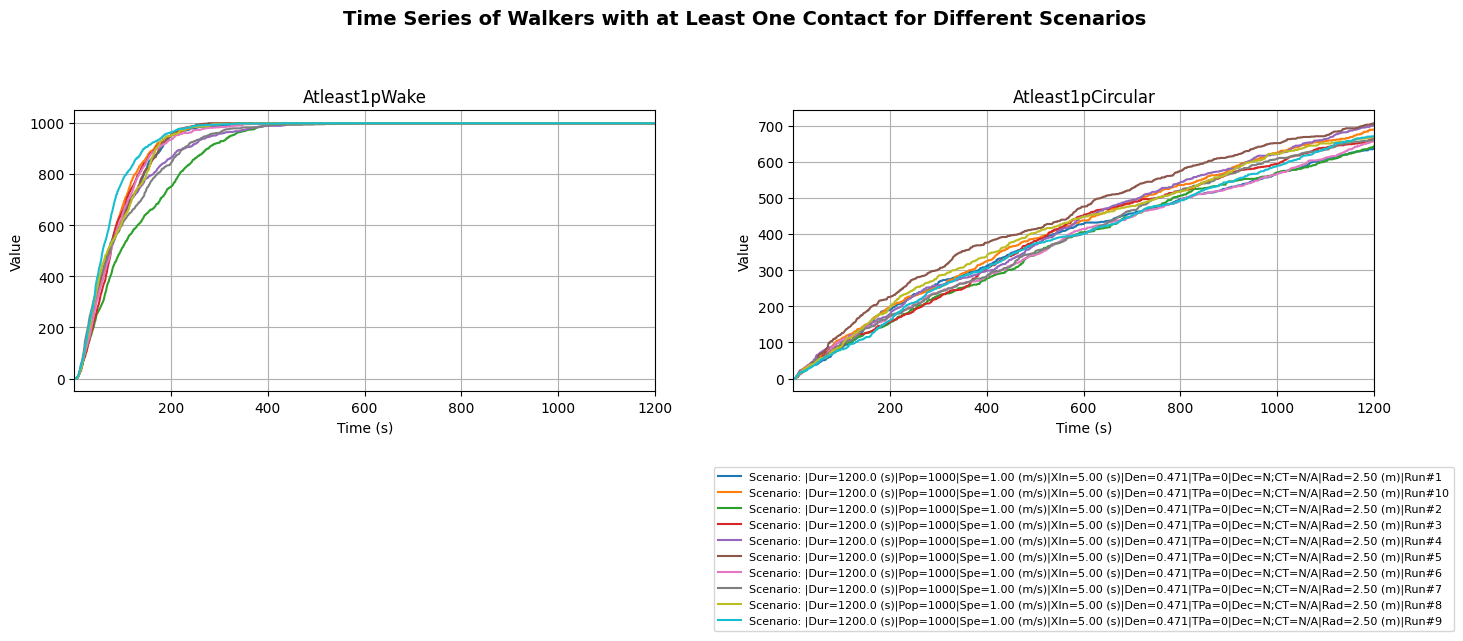

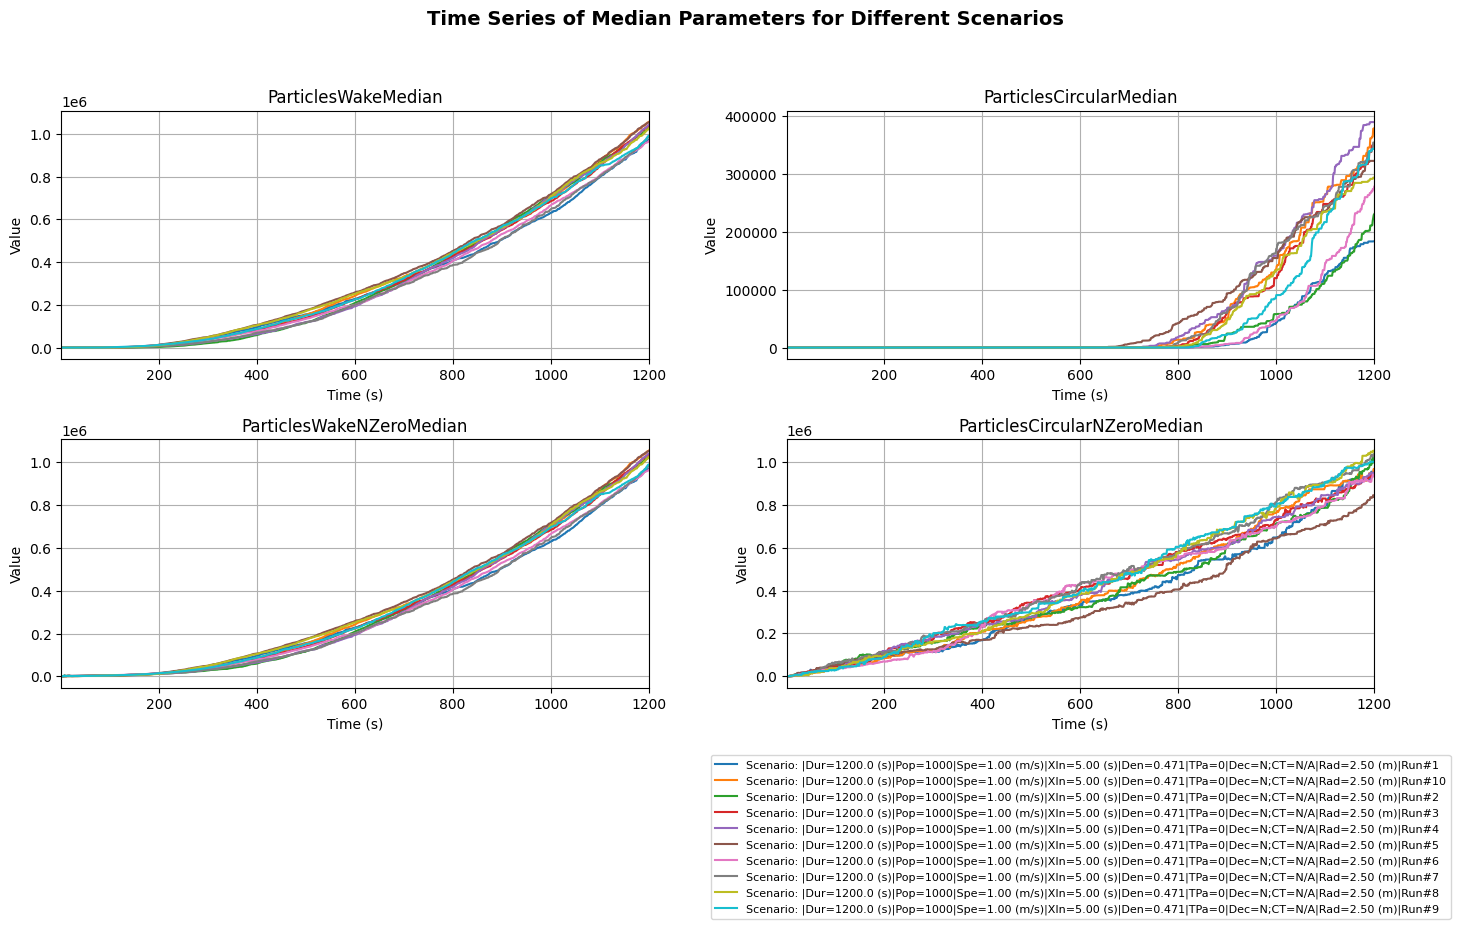

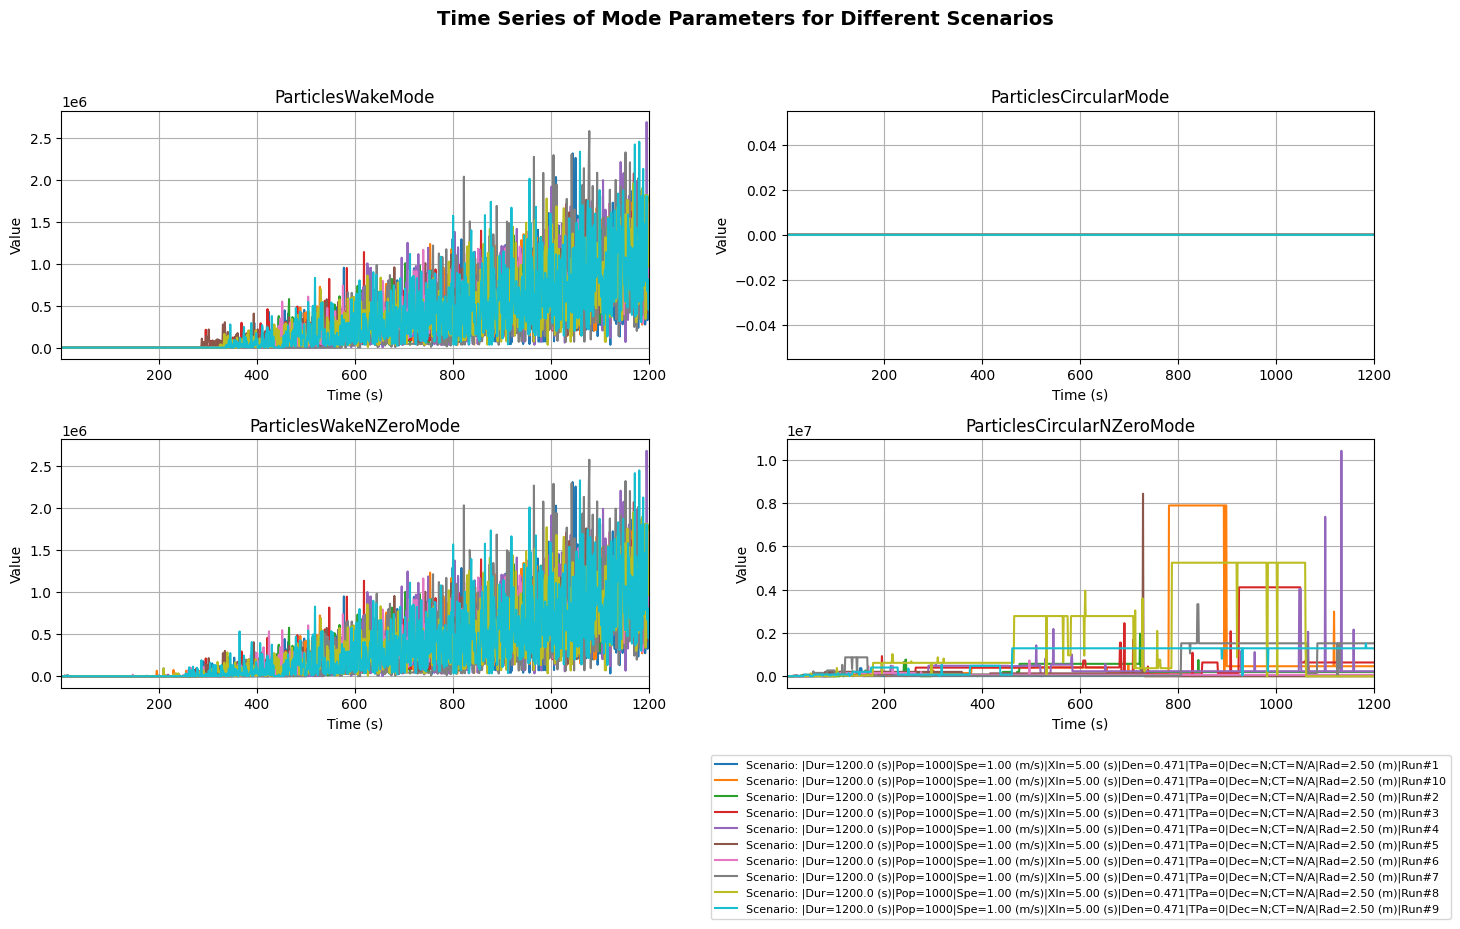

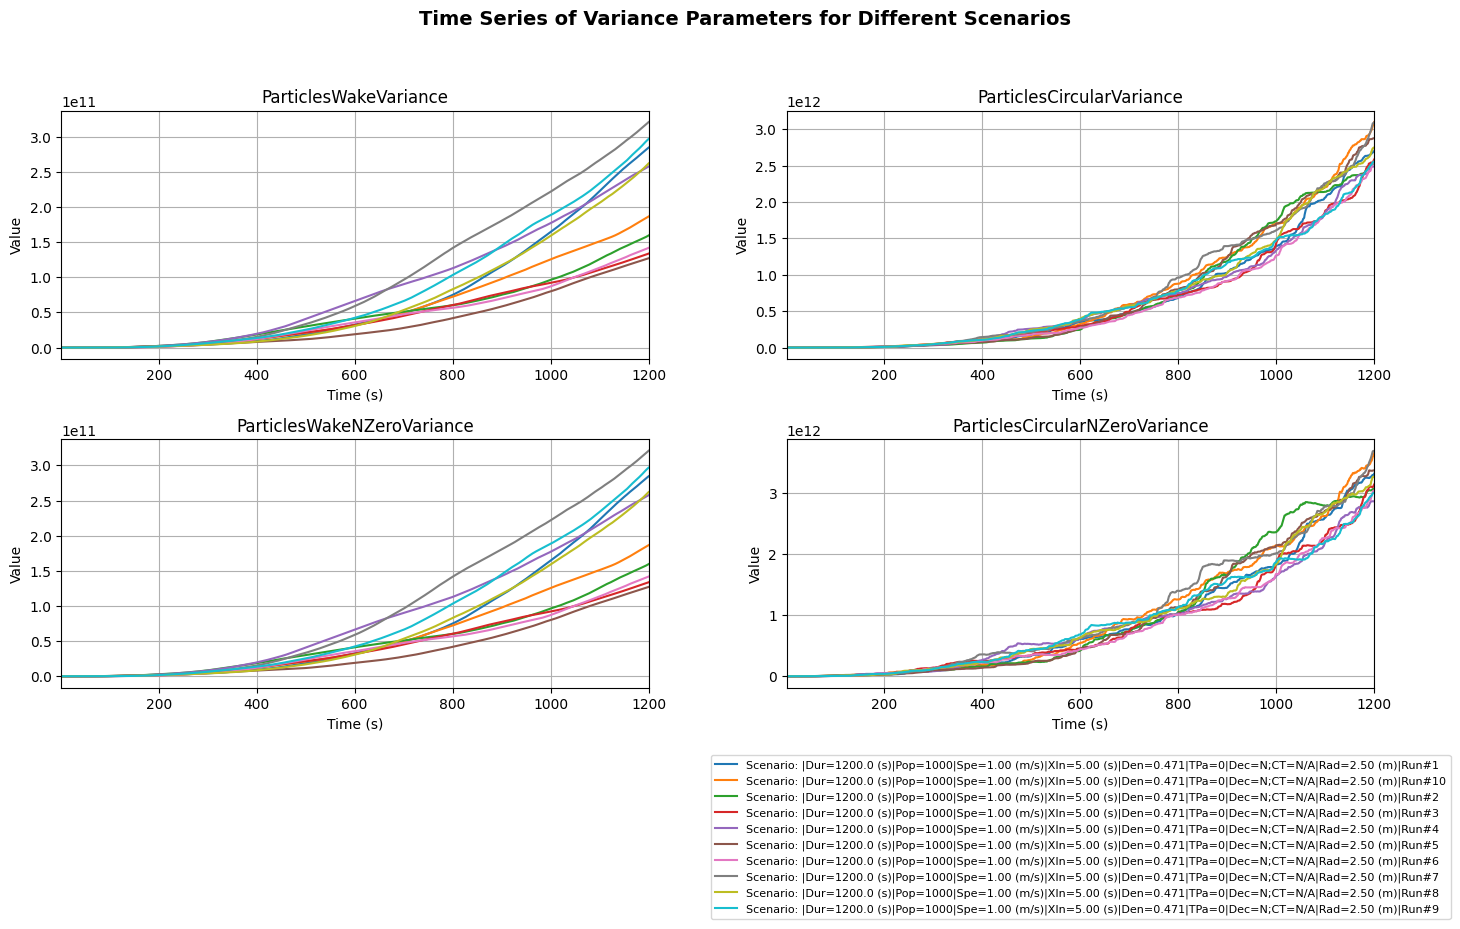

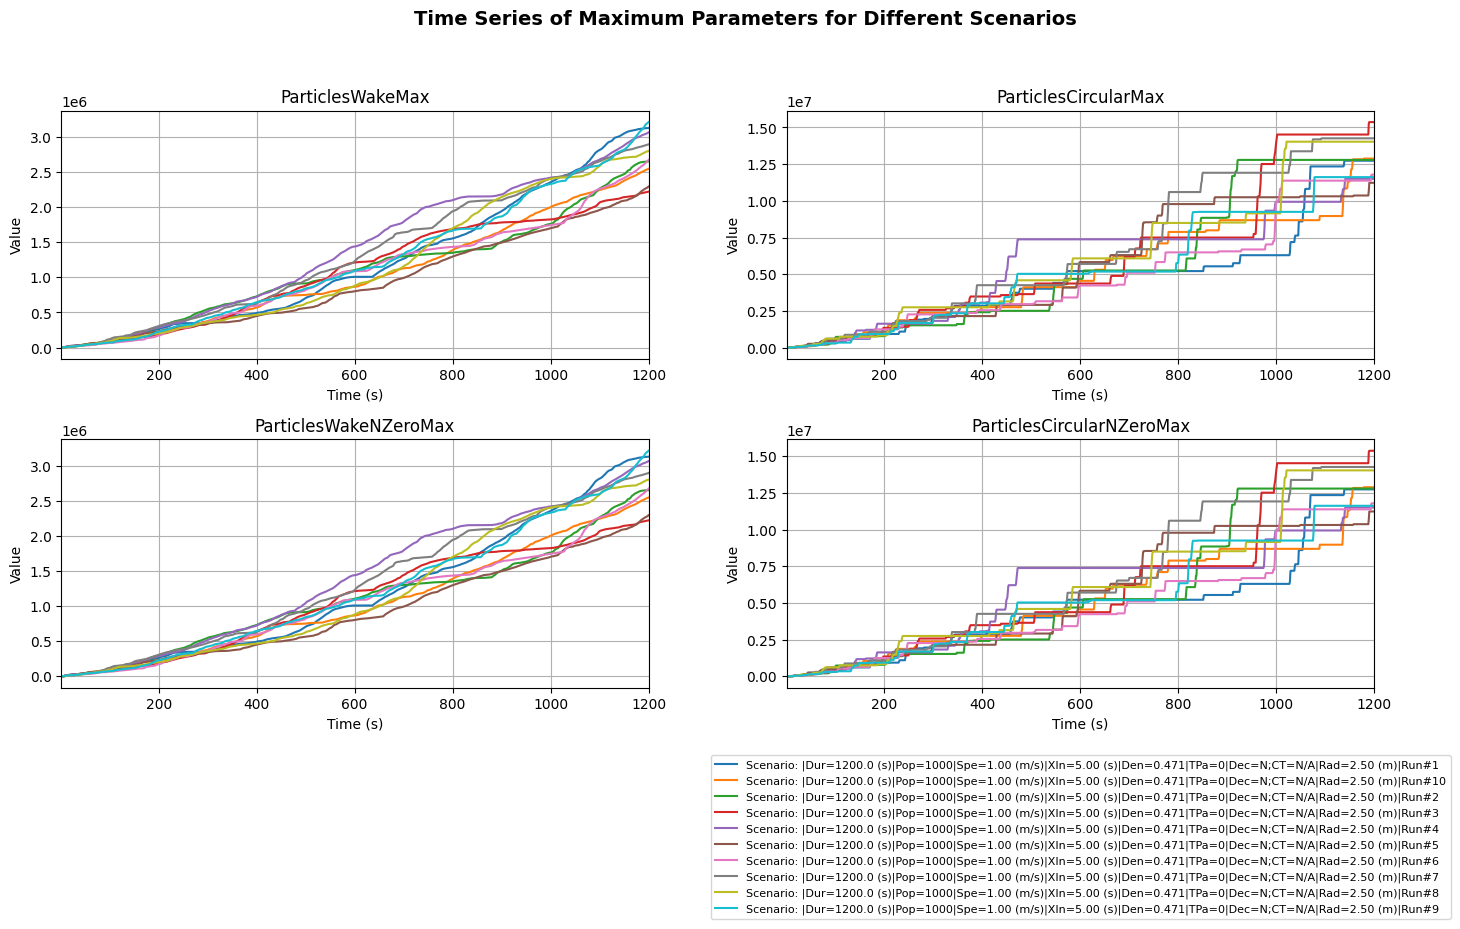

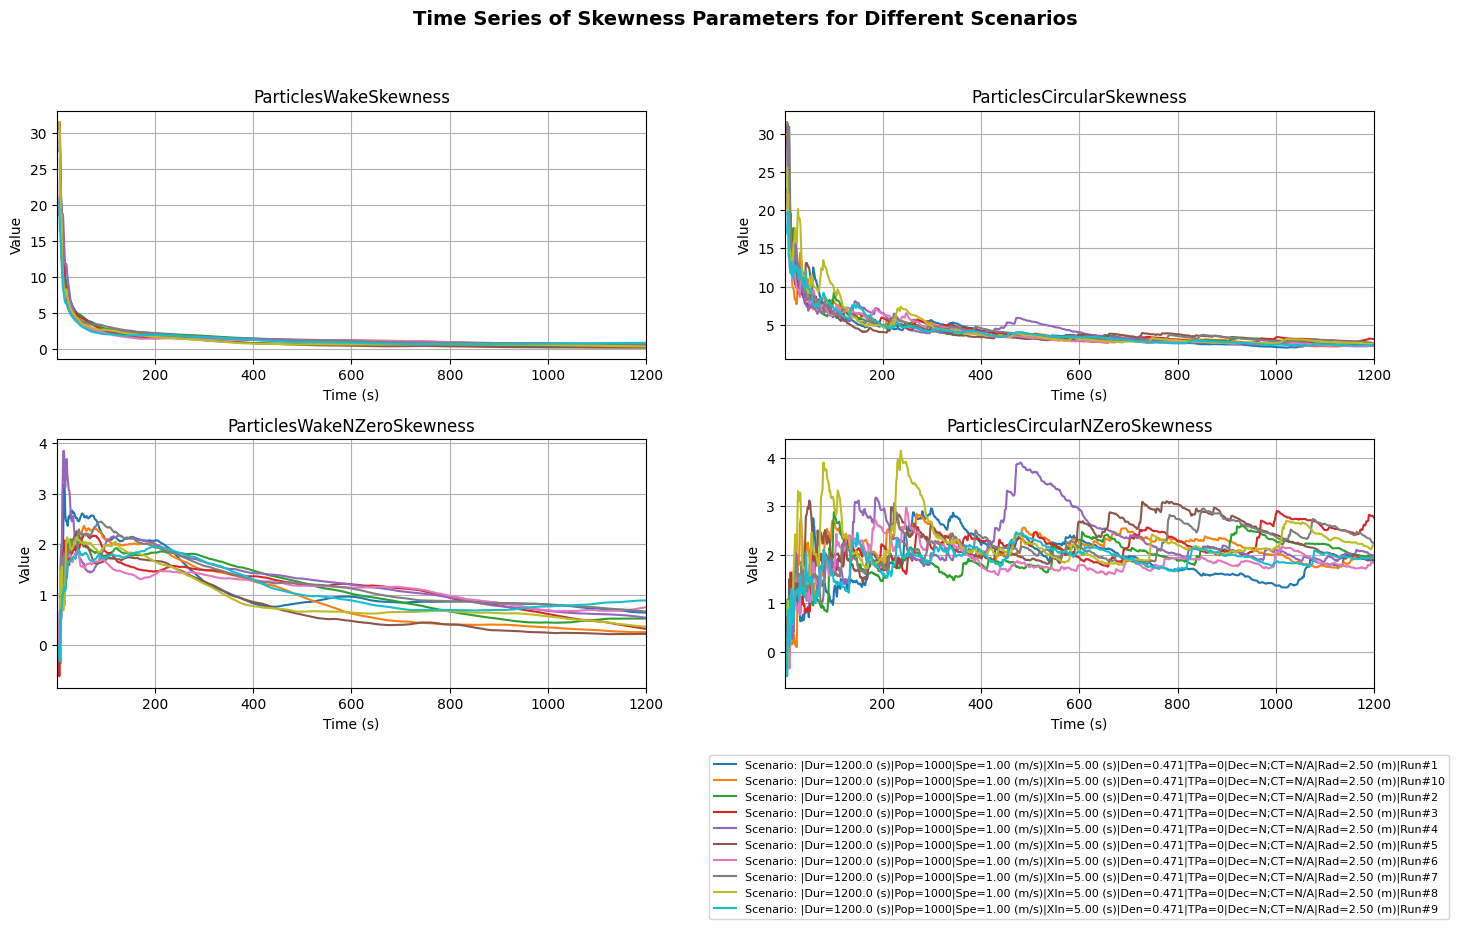

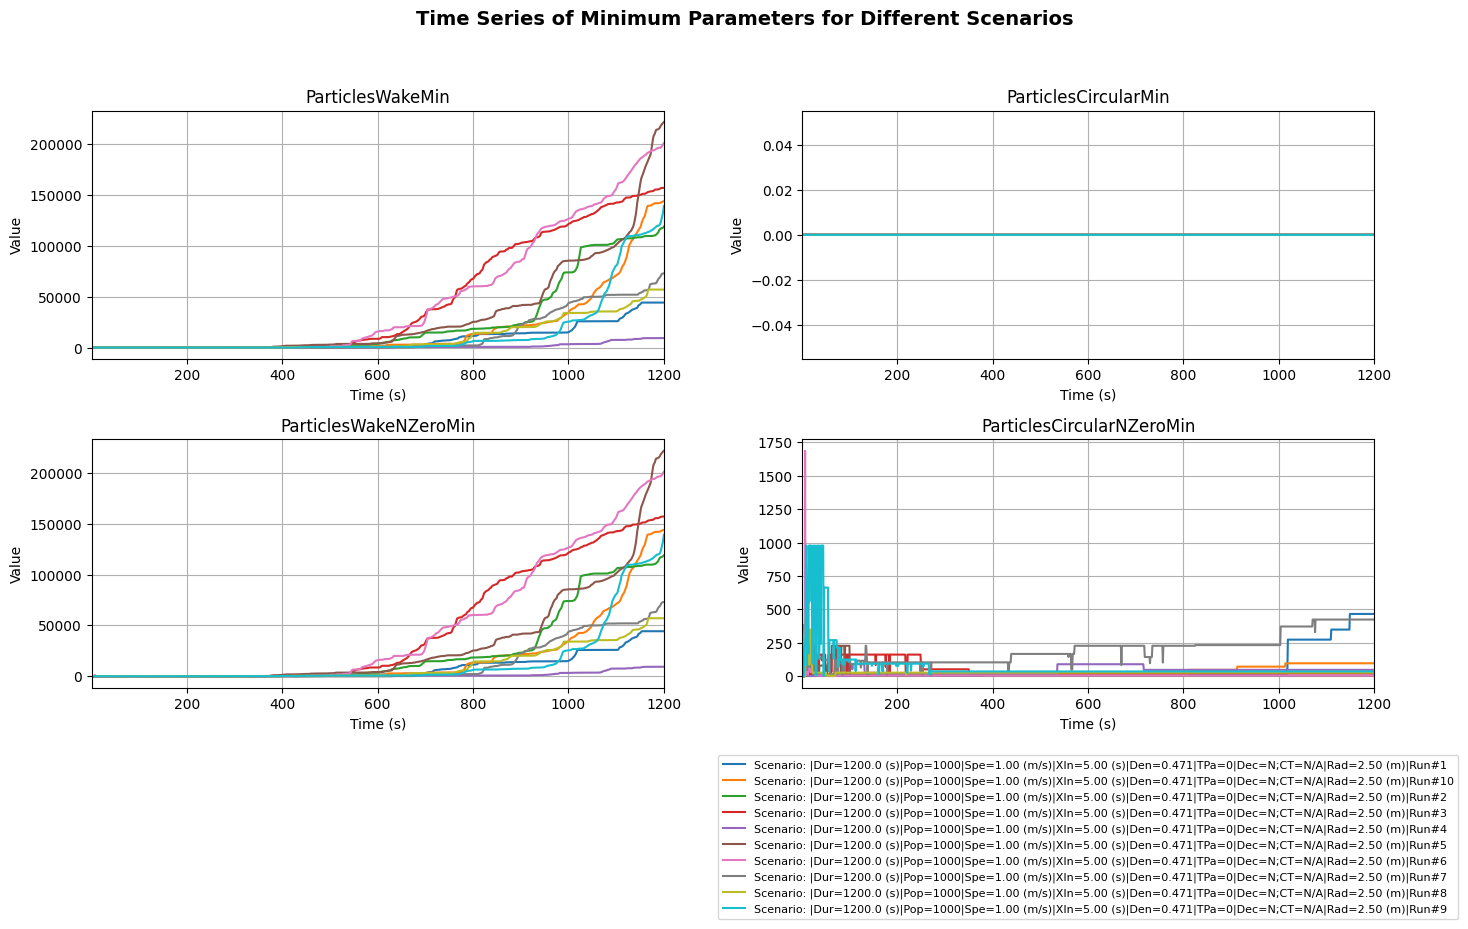

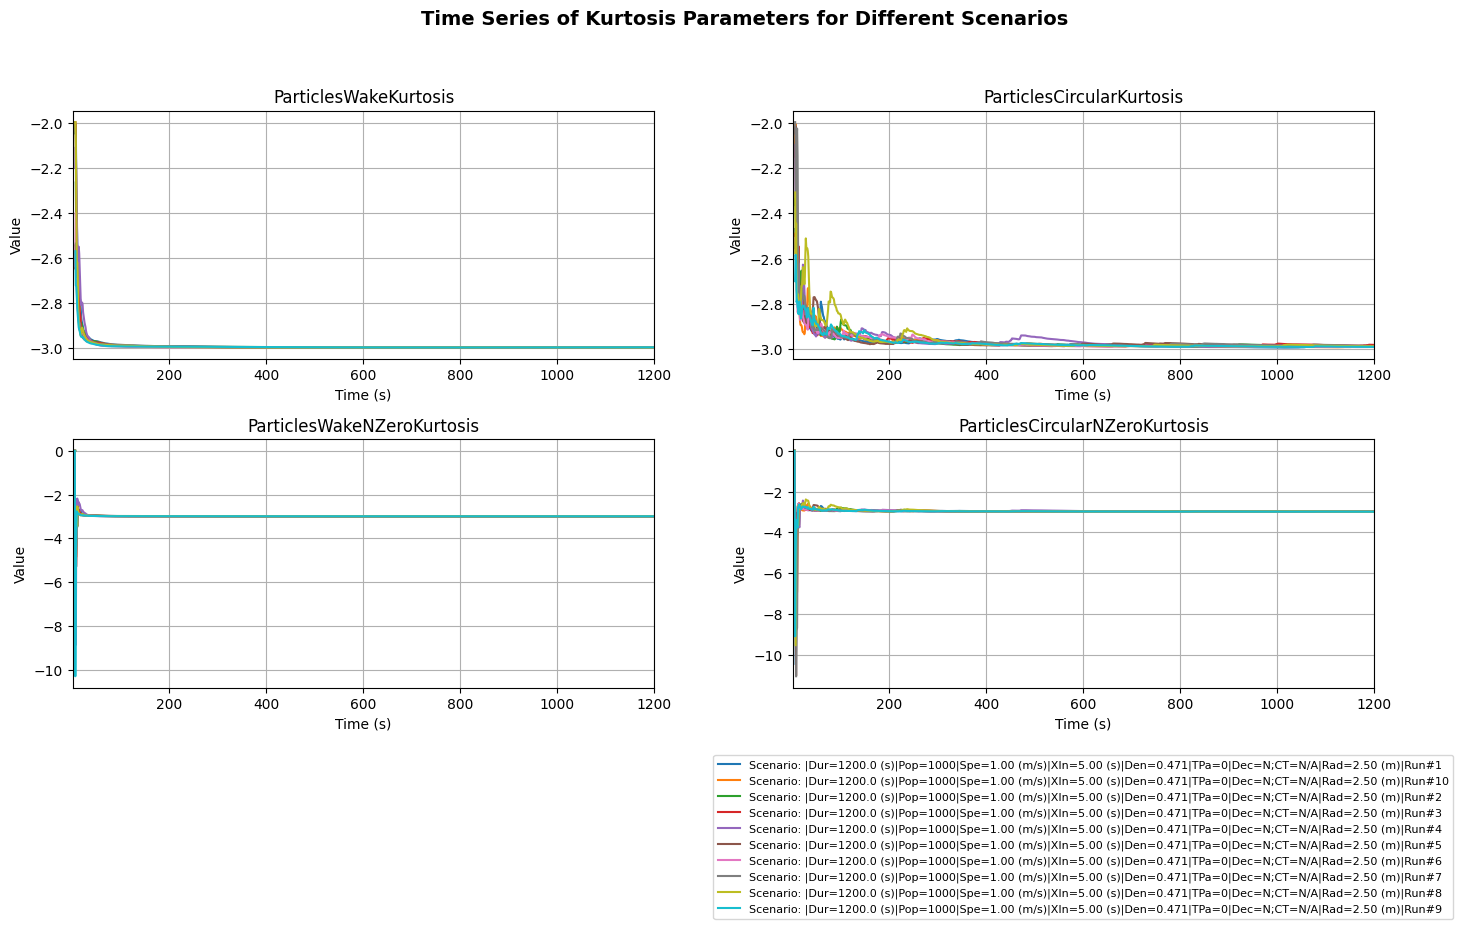

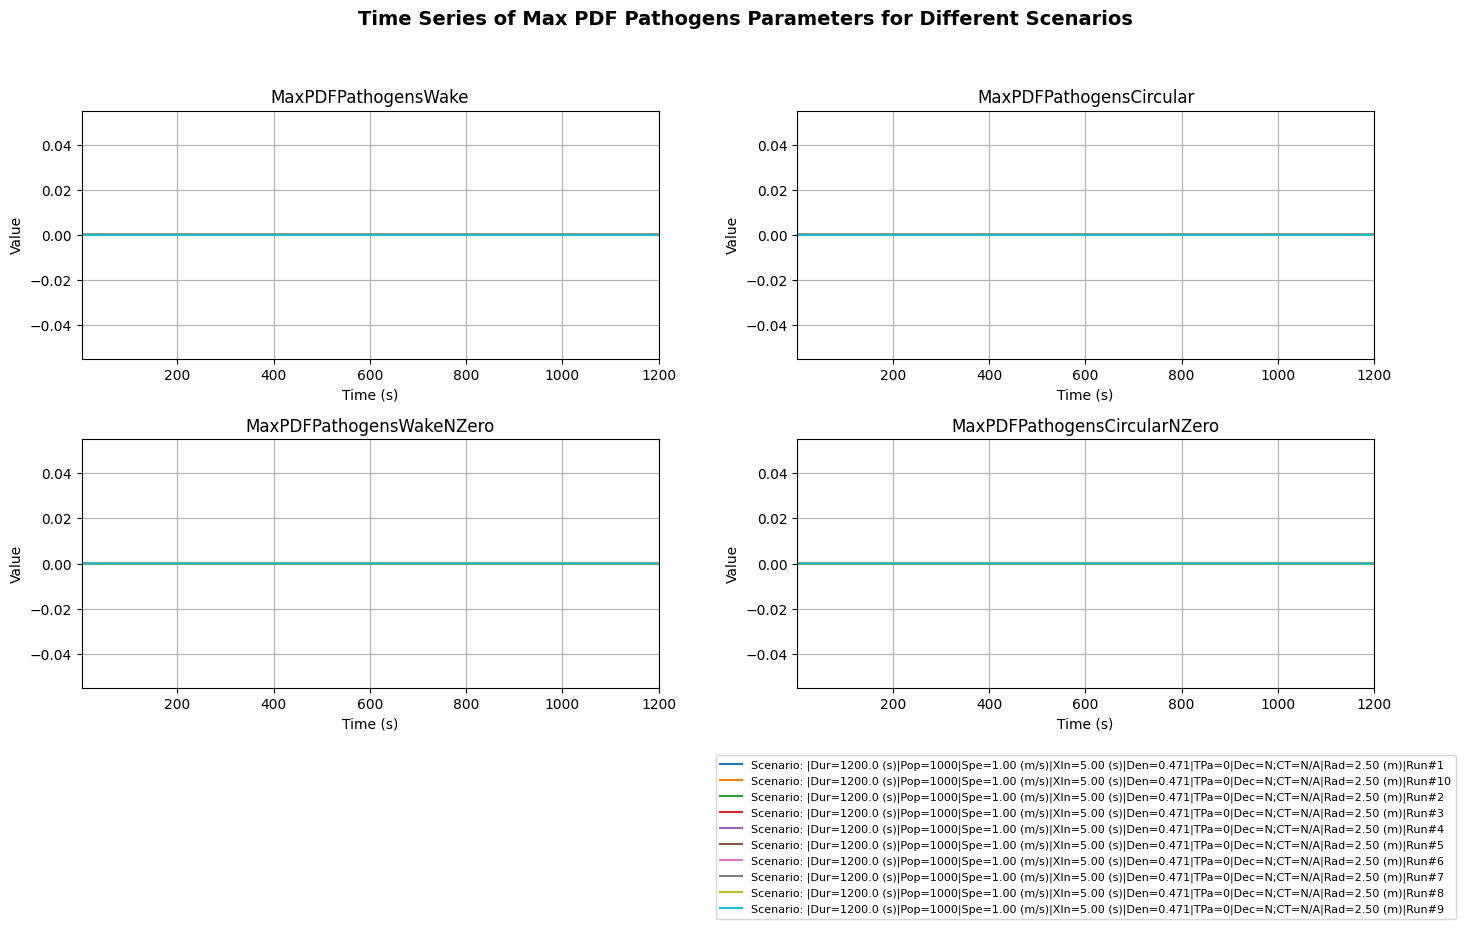

Image paths:
['/content/plots/Walkers with at Least One Contact.png', '/content/plots/Median Parameters.png', '/content/plots/Mode Parameters.png', '/content/plots/Variance Parameters.png', '/content/plots/Maximum Parameters.png', '/content/plots/Skewness Parameters.png', '/content/plots/Minimum Parameters.png', '/content/plots/Kurtosis Parameters.png', '/content/plots/Max PDF Pathogens Parameters.png']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder named "plots" to save the images
plots_folder = '/content/plots'
os.makedirs(plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Print available headers
print("Available Headers:")
print(df.columns.tolist())

# Define categories
categories = {
    "Walkers with at Least One Contact": [
        "Atleast1pWake",
        "Atleast1pCircular"
    ],
    "Median Parameters": [
        "ParticlesWakeMedian",
        "ParticlesCircularMedian",
        "ParticlesWakeNZeroMedian",
        "ParticlesCircularNZeroMedian"
    ],
    "Mode Parameters": [
        "ParticlesWakeMode",
        "ParticlesCircularMode",
        "ParticlesWakeNZeroMode",
        "ParticlesCircularNZeroMode"
    ],
    "Variance Parameters": [
        "ParticlesWakeVariance",
        "ParticlesCircularVariance",
        "ParticlesWakeNZeroVariance",
        "ParticlesCircularNZeroVariance"
    ],
    "Maximum Parameters": [
        "ParticlesWakeMax",
        "ParticlesCircularMax",
        "ParticlesWakeNZeroMax",
        "ParticlesCircularNZeroMax"
    ],
    "Skewness Parameters": [
        "ParticlesWakeSkewness",
        "ParticlesCircularSkewness",
        "ParticlesWakeNZeroSkewness",
        "ParticlesCircularNZeroSkewness"
    ],
    "Minimum Parameters": [
        "ParticlesWakeMin",
        "ParticlesCircularMin",
        "ParticlesWakeNZeroMin",
        "ParticlesCircularNZeroMin"
    ],
    "Kurtosis Parameters": [
        "ParticlesWakeKurtosis",
        "ParticlesCircularKurtosis",
        "ParticlesWakeNZeroKurtosis",
        "ParticlesCircularNZeroKurtosis"
    ],
    "Max PDF Pathogens Parameters": [
        "MaxPDFPathogensWake",
        "MaxPDFPathogensCircular",
        "MaxPDFPathogensWakeNZero",
        "MaxPDFPathogensCircularNZero"
    ]
}

# Plot data for each category
image_paths = []
for category, headers in categories.items():
    plt.figure(figsize=(15, 10))
    for i, header in enumerate(headers, 1):
        plt.subplot(2, 2, i)
        if header in df.columns:  # Check if header is present in the DataFrame
            for scenario in df['Title'].unique():
                scenario_data = df[df['Title'] == scenario]
                plt.plot(scenario_data['time(s)'], scenario_data[header], label=f'Scenario: {scenario}')

        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.title(header)
        plt.grid(True)
        plt.xlim(df['time(s)'].min(), df['time(s)'].max())

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=8)
    plt.suptitle(f'Time Series of {category} for Different Scenarios', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot as a high-quality image in the "plots" folder
    plot_path = os.path.join(plots_folder, f'{category}.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    # plt.close()
    image_paths.append(plot_path)

# Print the paths of saved images
print("Image paths:")
print(image_paths)

### 1.2. **Upload Plots on Google Drive to be able to Add to Google Slides**

In [2]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
import datetime

# Authenticate and create the service
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Create a folder with a unique name based on the current date and time
folder_name = f"plots_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
folder_metadata = {
    'name': folder_name,
    'mimeType': 'application/vnd.google-apps.folder'
}
folder = drive_service.files().create(body=folder_metadata, fields='id').execute()
folder_id = folder.get('id')

# Folder path containing the images
image_folder_path = '/content/plots/'

# List all files in the image folder
image_files = os.listdir(image_folder_path)

# Upload each image file to the specified folder
for image_file in image_files:
    file_metadata = {
        'name': image_file,
        'parents': [folder_id]  # Specify the folder ID as the parent
    }
    media = MediaFileUpload(os.path.join(image_folder_path, image_file), resumable=True)
    file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
    print('Uploaded:', image_file)  # Print the name of the image file

Uploaded: Maximum Parameters.png
Uploaded: Skewness Parameters.png
Uploaded: Minimum Parameters.png
Uploaded: Max PDF Pathogens Parameters.png
Uploaded: Median Parameters.png
Uploaded: Mode Parameters.png
Uploaded: Kurtosis Parameters.png
Uploaded: Walkers with at Least One Contact.png
Uploaded: Variance Parameters.png


### 1.3. **Read from Google Drive and Add to Google Slides**

In [3]:
from google.colab import auth
from googleapiclient.discovery import build
import os

# Authenticate and create the service
auth.authenticate_user()
slides_service = build('slides', 'v1')
drive_service = build('drive', 'v3')

# Presentation ID
presentation_id = '1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8'

# Folder ID where the images are uploaded
folder_id = '1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj'
folder_id = '1M_emSDMN8-3oat9tZ-_0nPPGbH99Jc07'

# List files in the folder
results = drive_service.files().list(q=f"'{folder_id}' in parents", fields="files(id, name)").execute()
files = results.get('files', [])

# Iterate over each image file
for file in files:
    # Create a new slide
    slide = {
        "createSlide": {}
    }
    response = slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": [slide]}).execute()
    new_slide_id = response['replies'][0]['createSlide']['objectId']

    # Add the image to the new slide
    image_url = f"https://drive.google.com/uc?id={file['id']}"
    requests = [
        {
            "createImage": {
                "url": image_url,
                "elementProperties": {
                    "pageObjectId": new_slide_id
                }
            }
        }
    ]
    slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": requests}).execute()
    print(f"Image '{file['name']}' added to a new slide.")

Image 'Variance Parameters.png' added to a new slide.
Image 'Walkers with at Least One Contact.png' added to a new slide.
Image 'Kurtosis Parameters.png' added to a new slide.
Image 'Mode Parameters.png' added to a new slide.
Image 'Median Parameters.png' added to a new slide.
Image 'Max PDF Pathogens Parameters.png' added to a new slide.
Image 'Minimum Parameters.png' added to a new slide.
Image 'Skewness Parameters.png' added to a new slide.
Image 'Maximum Parameters.png' added to a new slide.


## 2. **Compare Statistics of Raw Data**

### 2.1. **Draw and Save Charts of Raw Data**

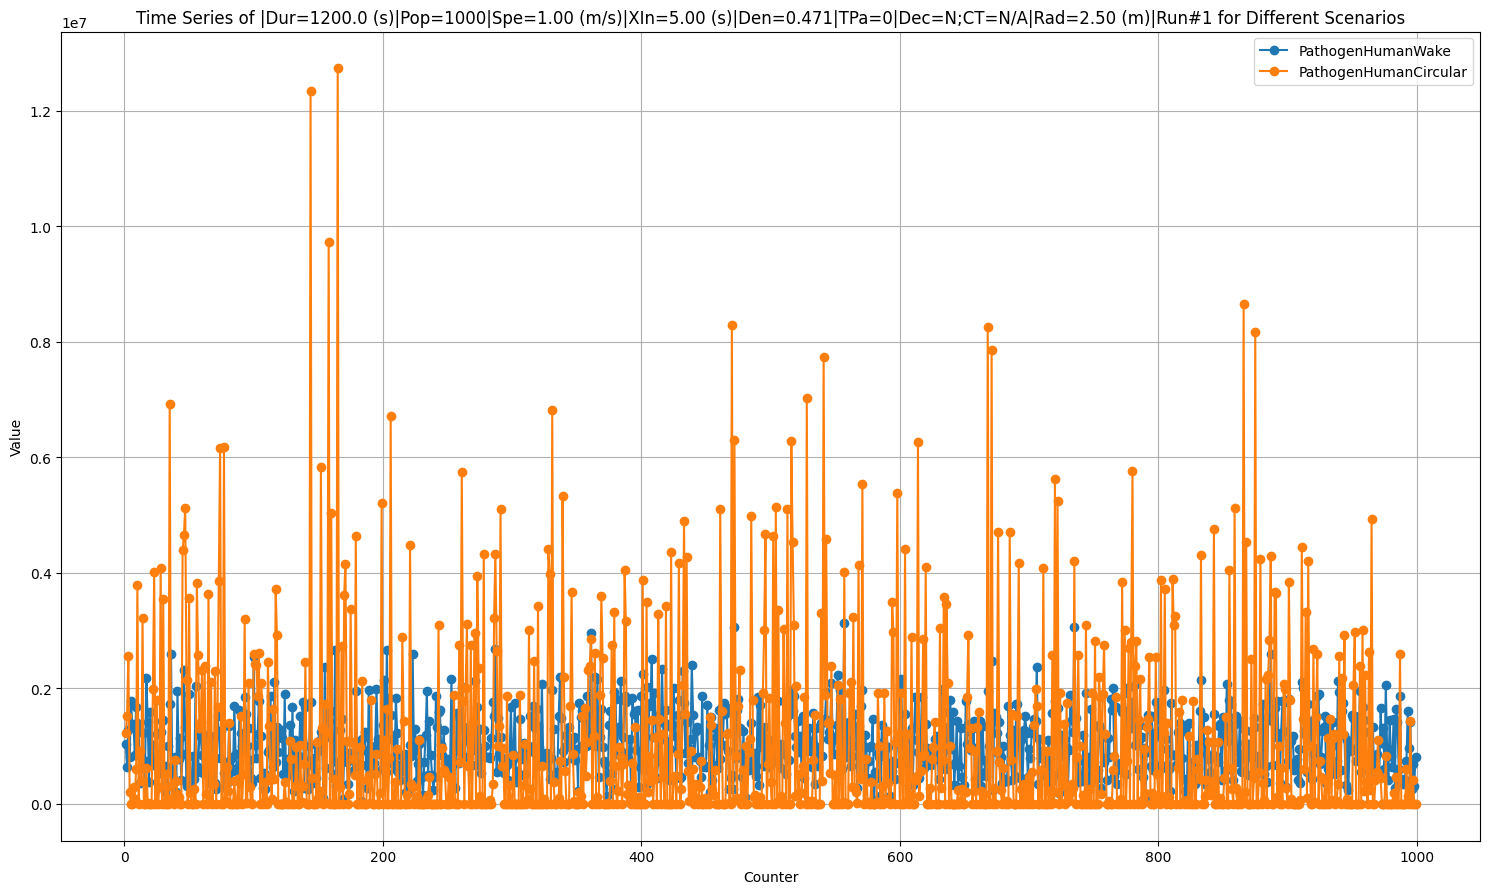

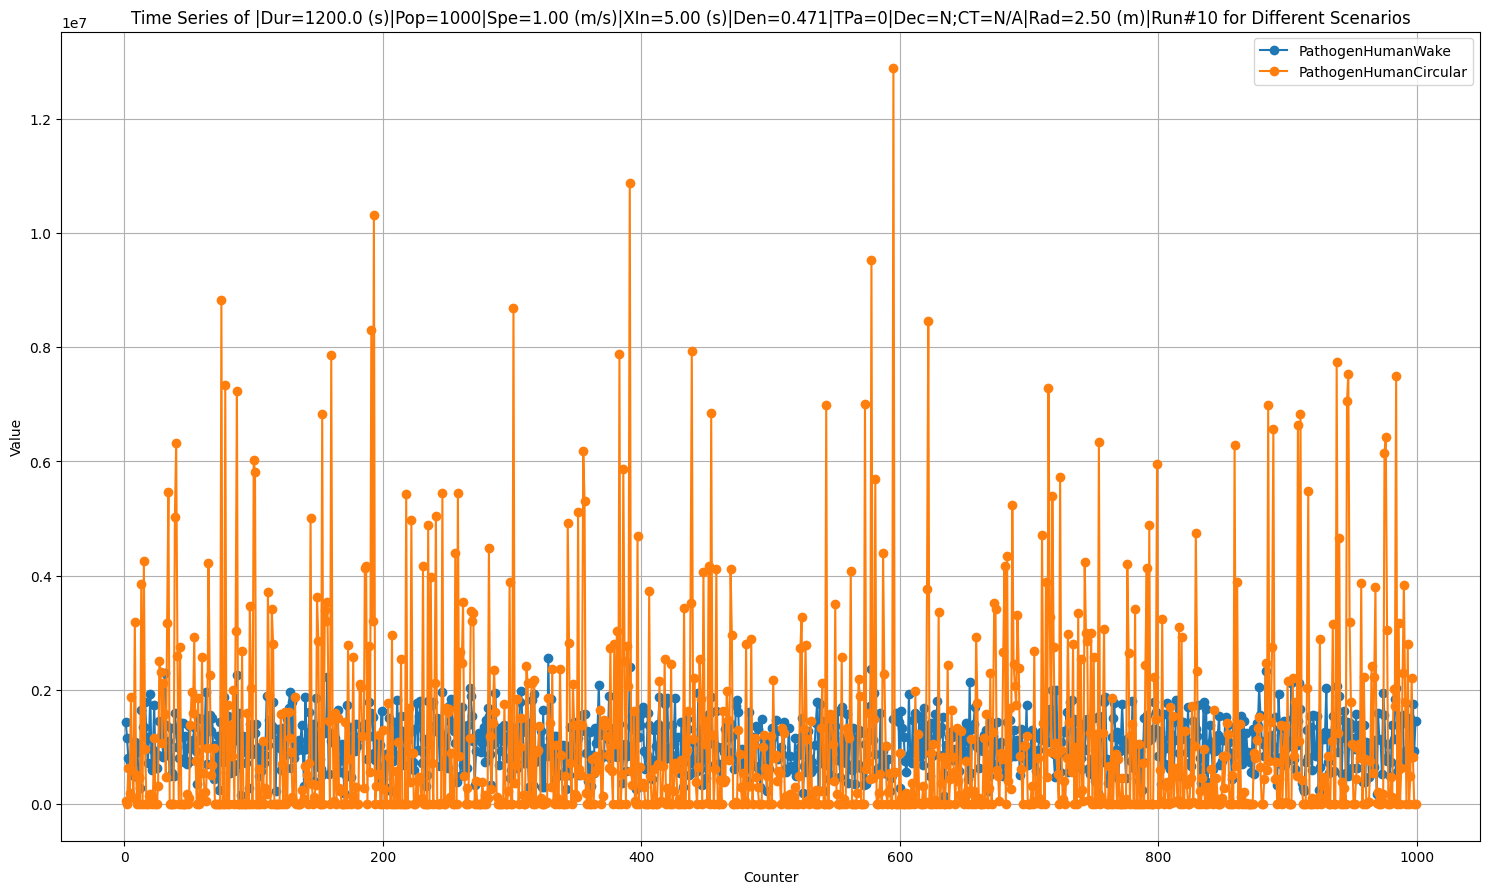

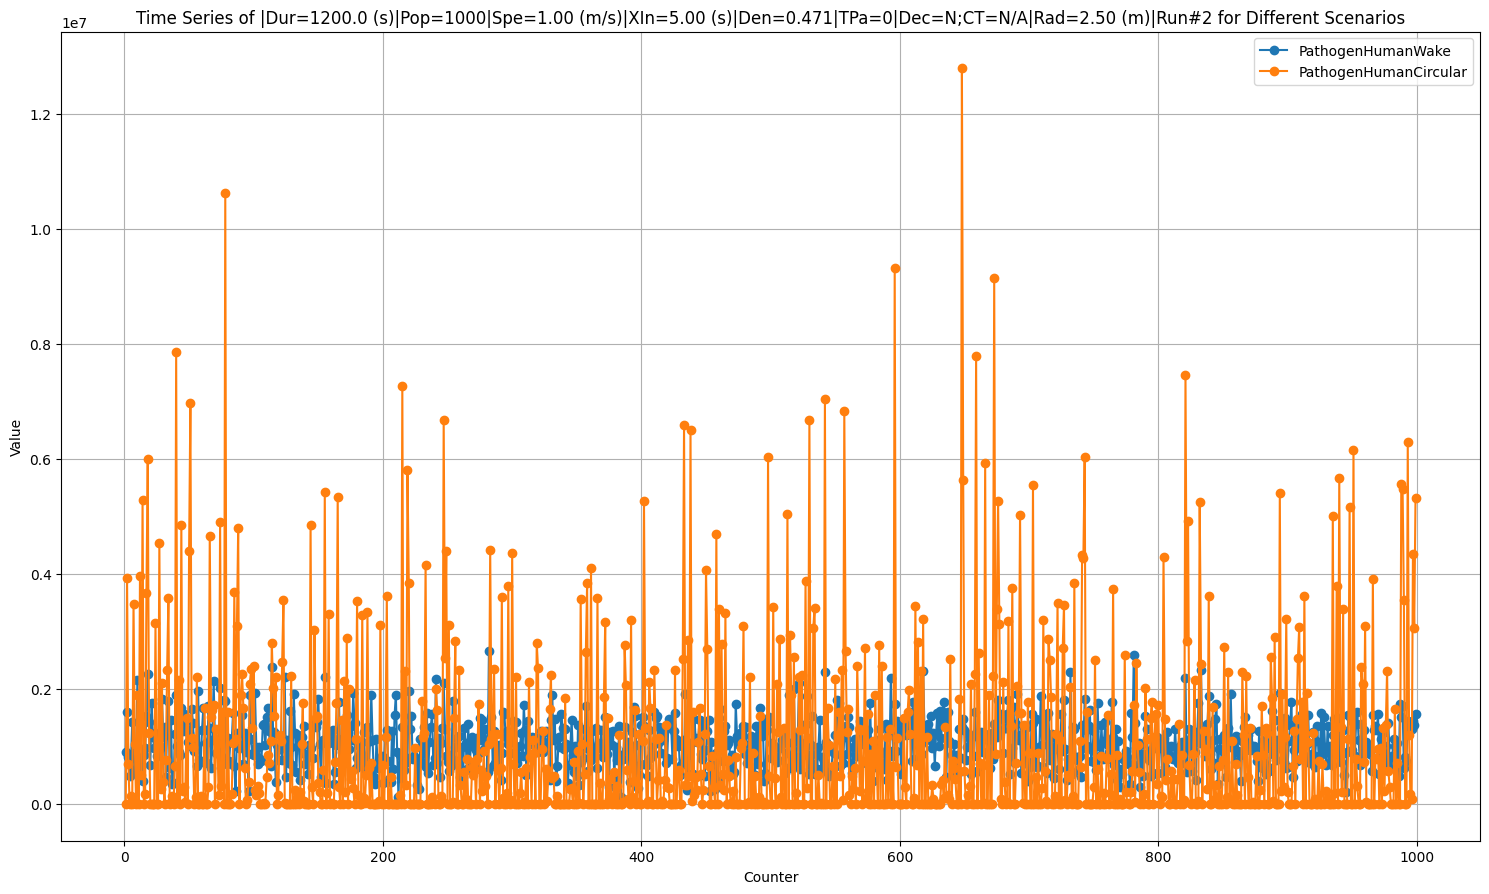

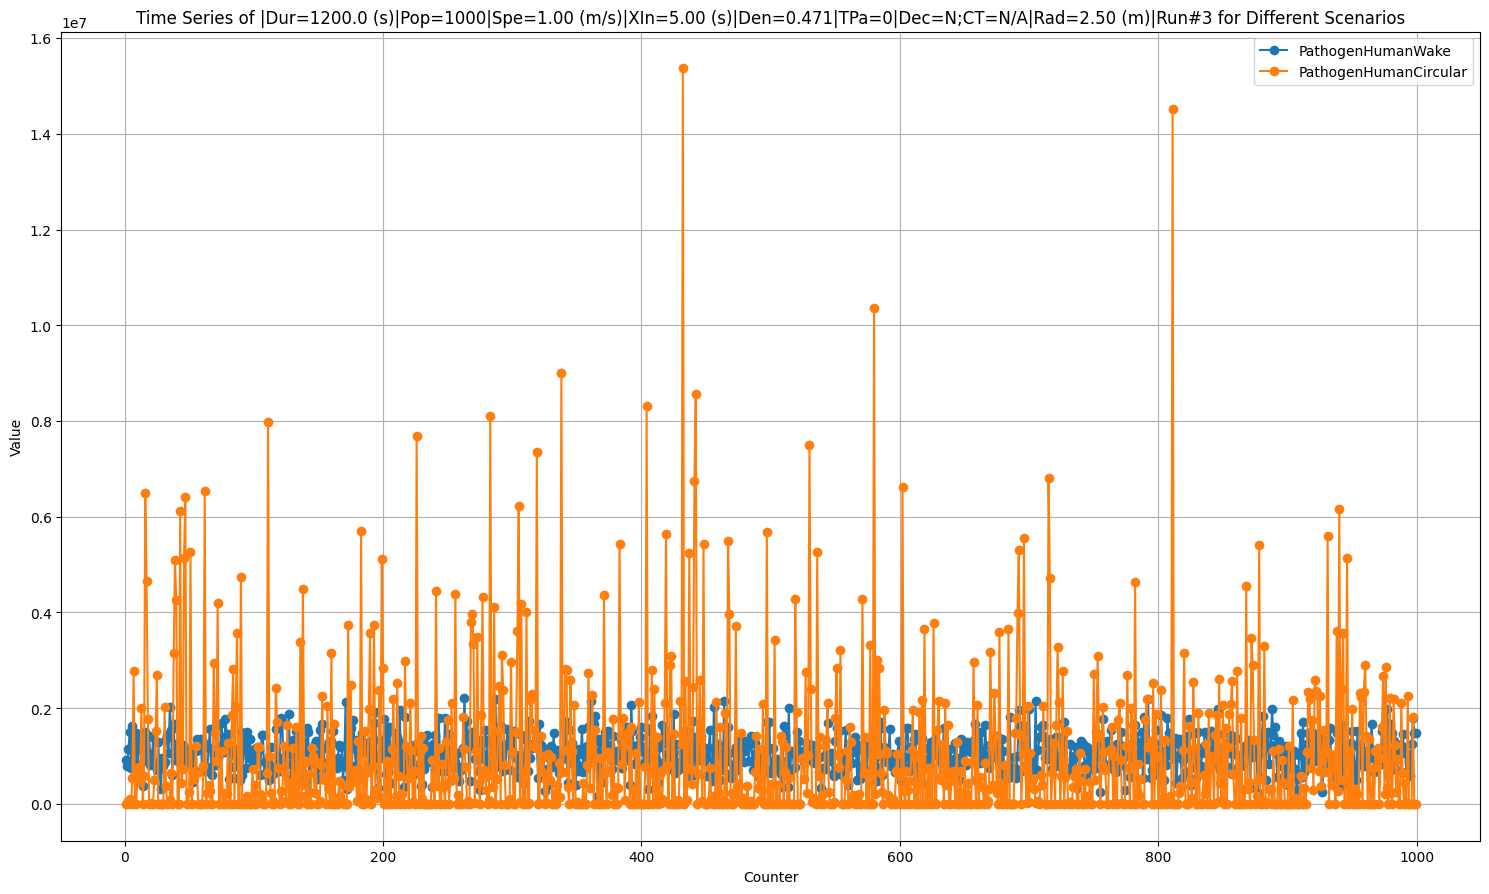

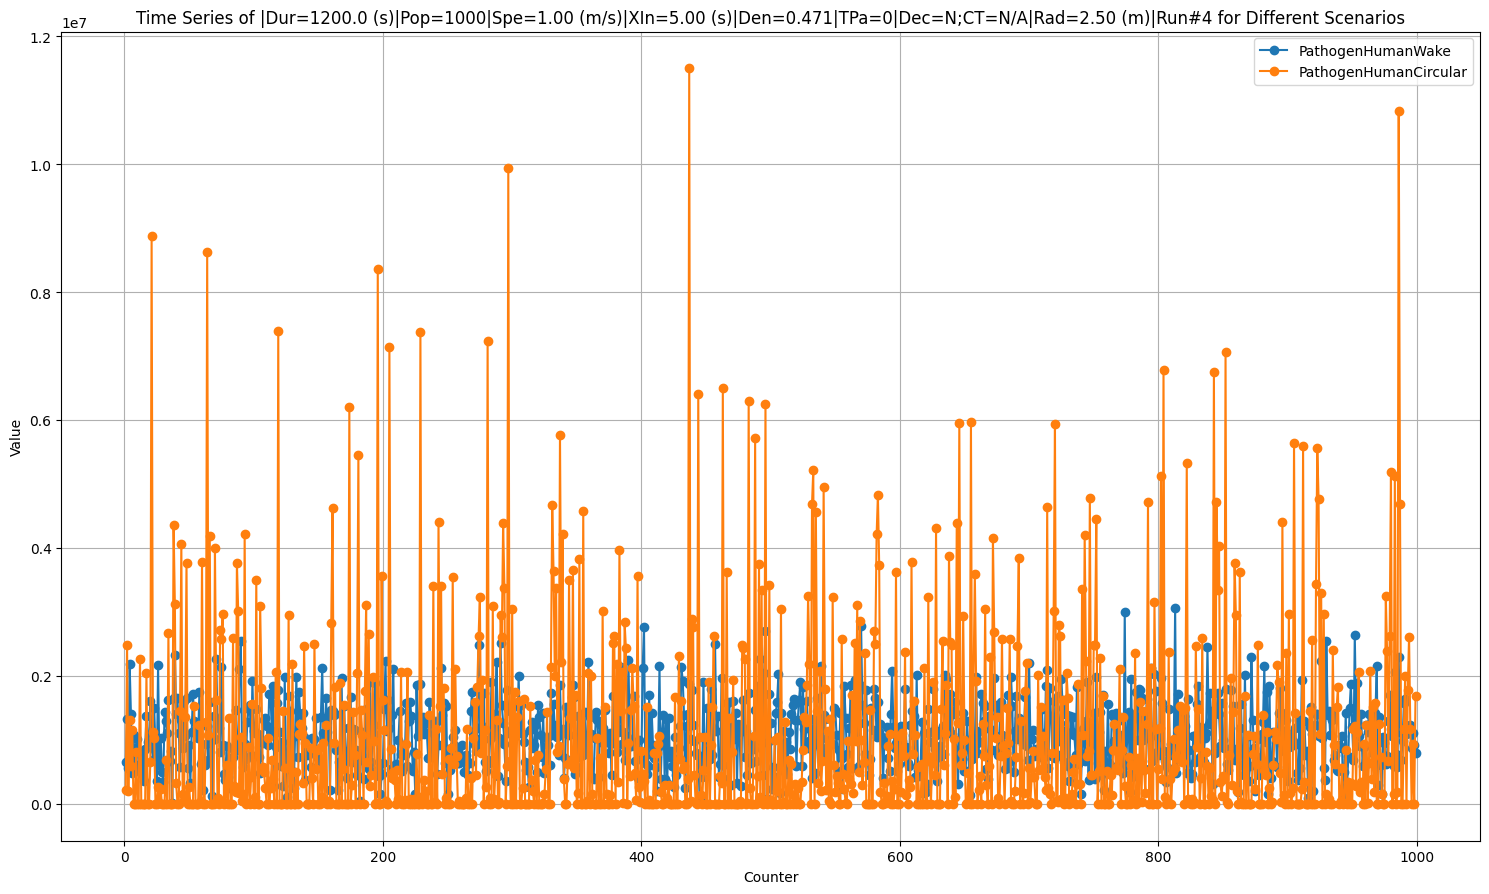

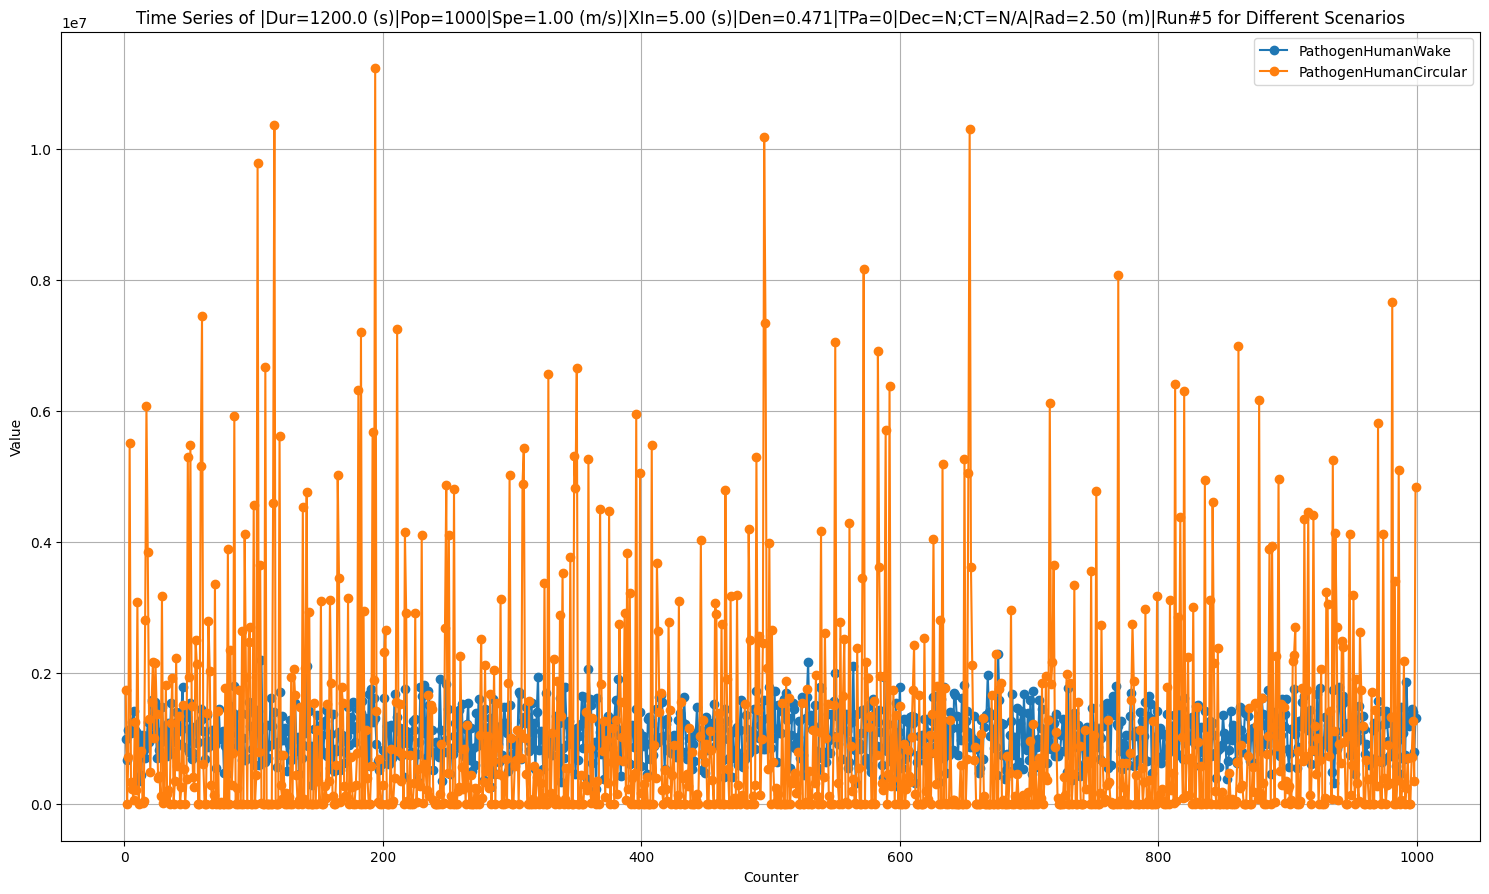

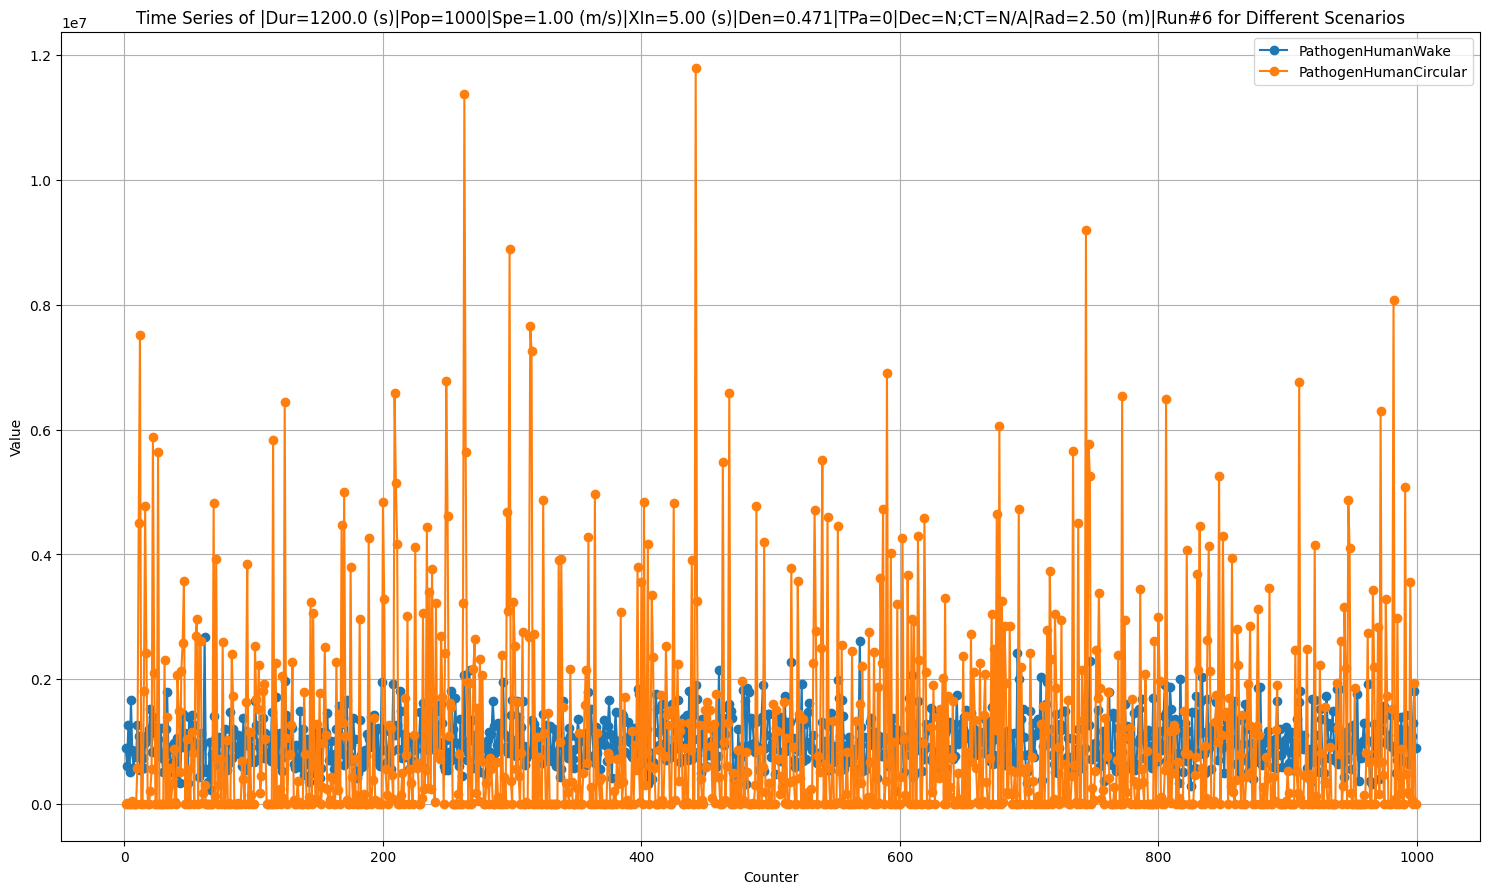

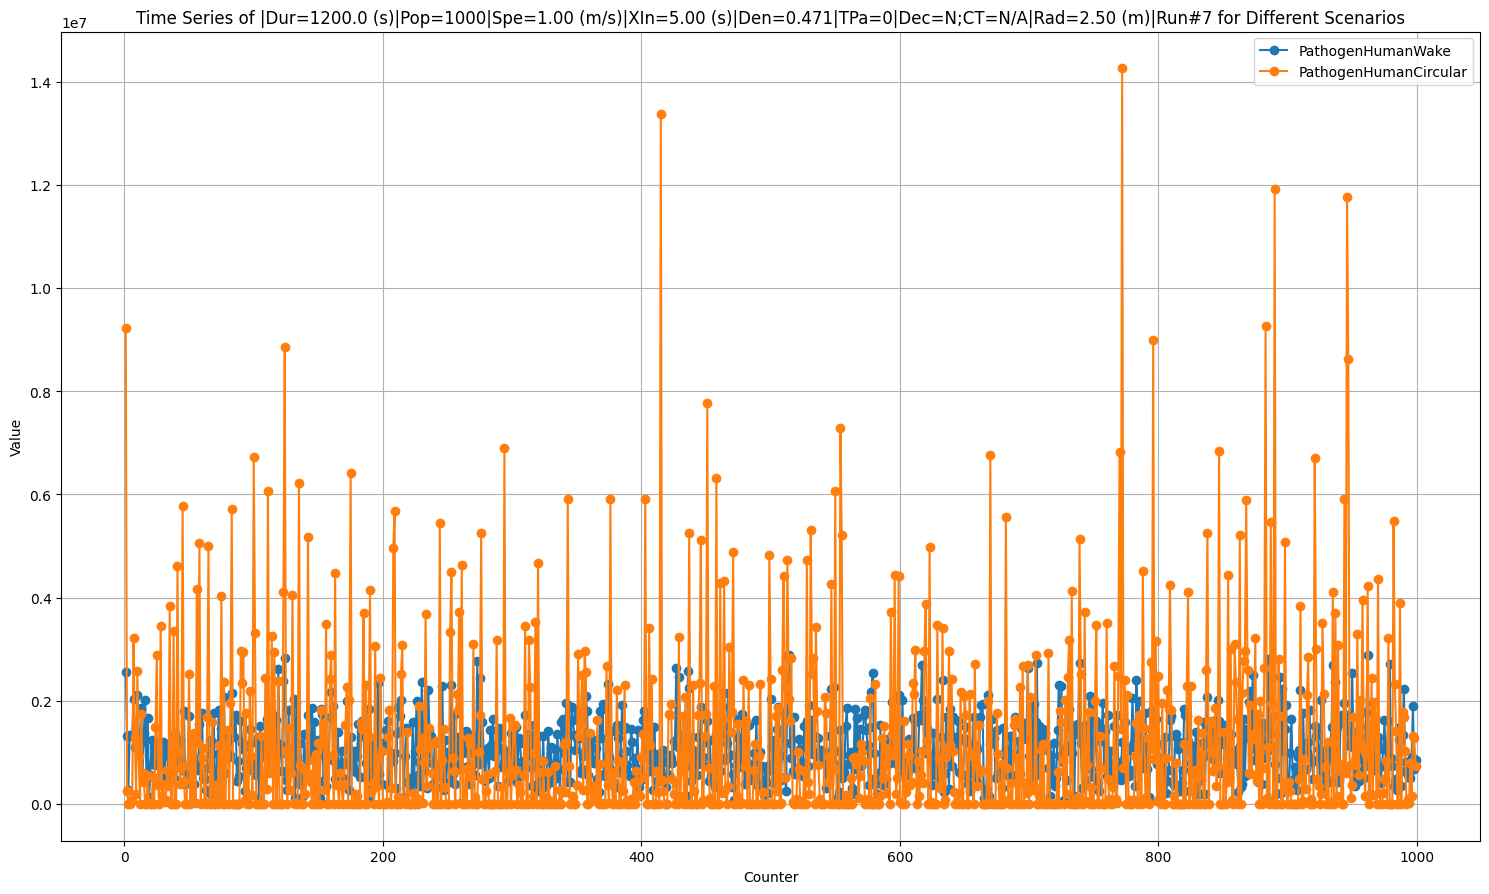

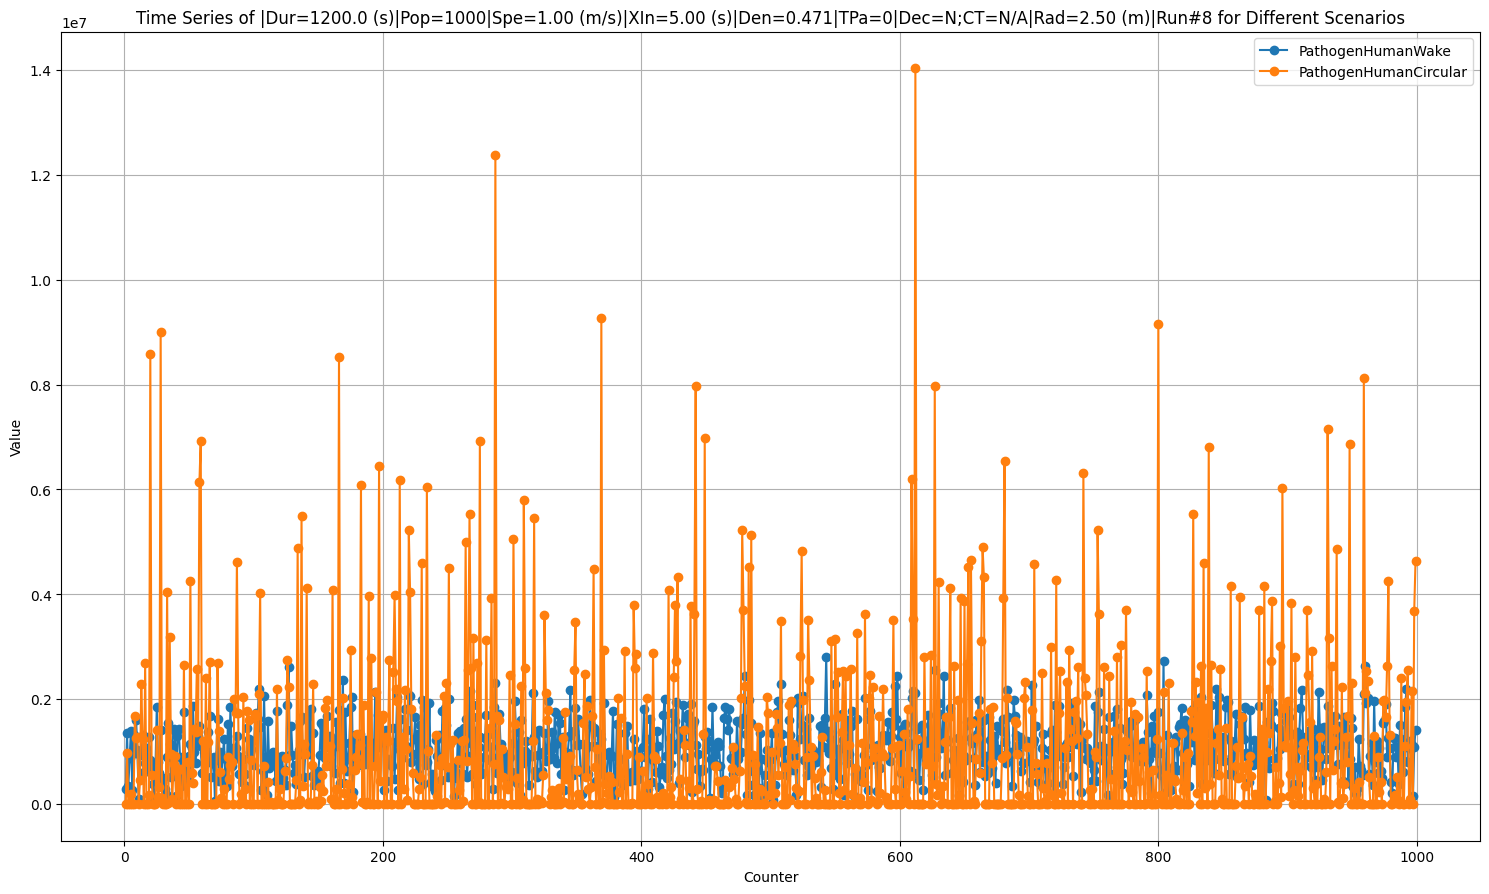

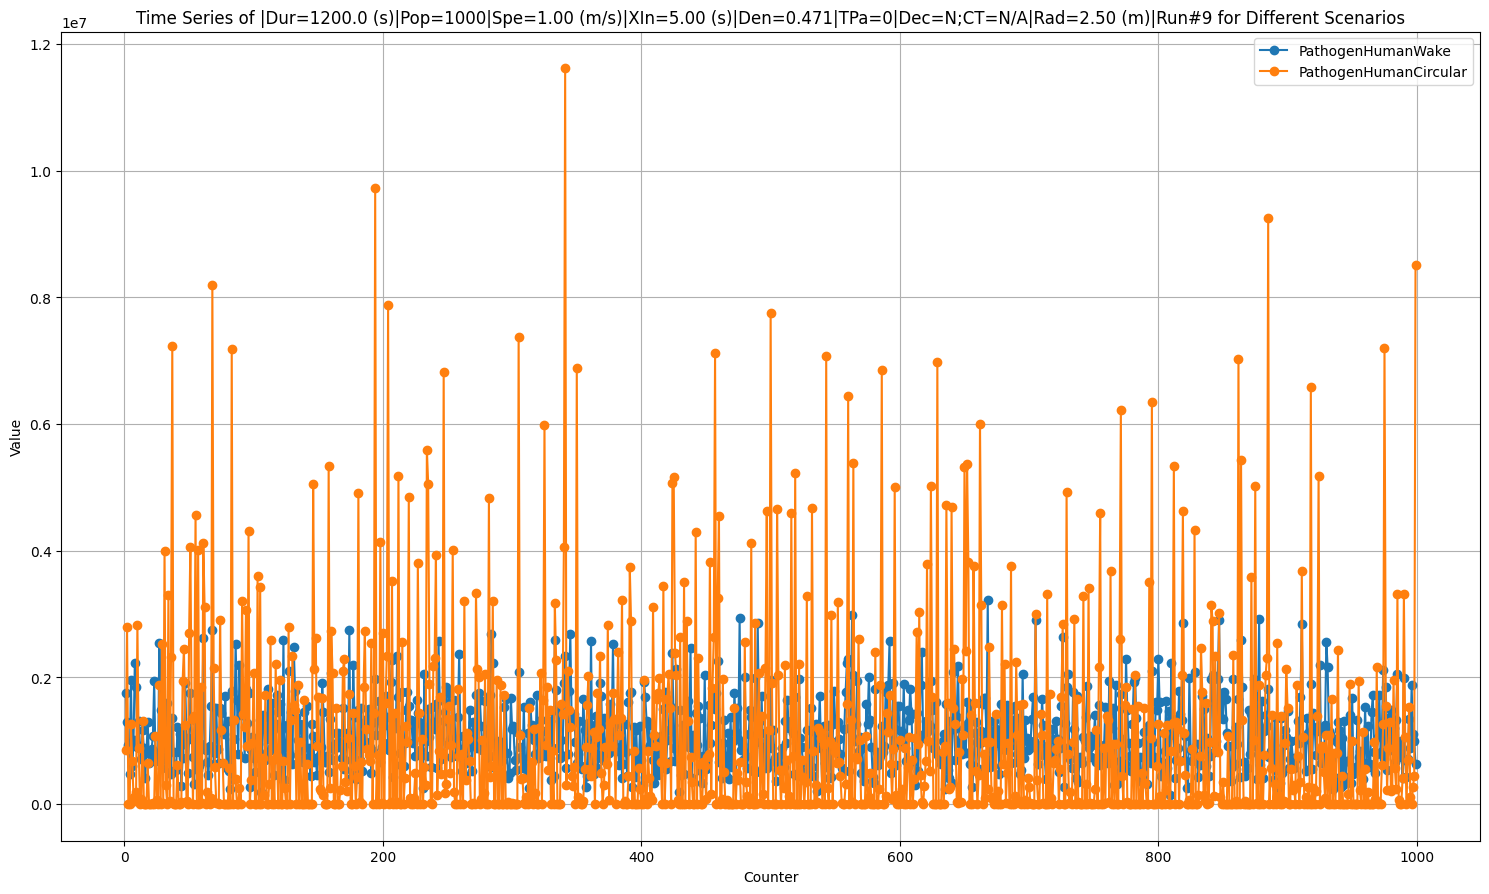

Image paths:
['/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#1.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#10.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#2.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#3.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#4.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#5.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#6.png', '/content/plots/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#7.png', '

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Create a folder named "plots" to save the images
plots_folder = '/content/plots'
os.makedirs(plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Group the data by 'Scenario'
grouped_data = df.groupby('Scenario')

# Plot data for each scenario
for scenario, data in grouped_data:
    plt.figure(figsize=(15, 10))
    plt.plot(data['counterAll'], data['PathogenHumanWake'], label='PathogenHumanWake', marker='o')
    plt.plot(data['counterAll'], data['PathogenHumanCircular'], label='PathogenHumanCircular', marker='o')
    plt.xlabel('Counter')
    plt.ylabel('Value')
    plt.title(f'Time Series of {scenario} for Different Scenarios')
    plt.grid(True)
    plt.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Sanitize scenario name for filename
    sanitized_scenario = re.sub(r'[\\/:"*?<>|]', '_', scenario)

    # Save the plot as a high-quality image in the "plots" folder
    plot_path = os.path.join(plots_folder, f'{sanitized_scenario}.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()

# Print the paths of saved images
print("Image paths:")
print([os.path.join(plots_folder, f'{sanitized_scenario}.png') for sanitized_scenario in grouped_data.groups])

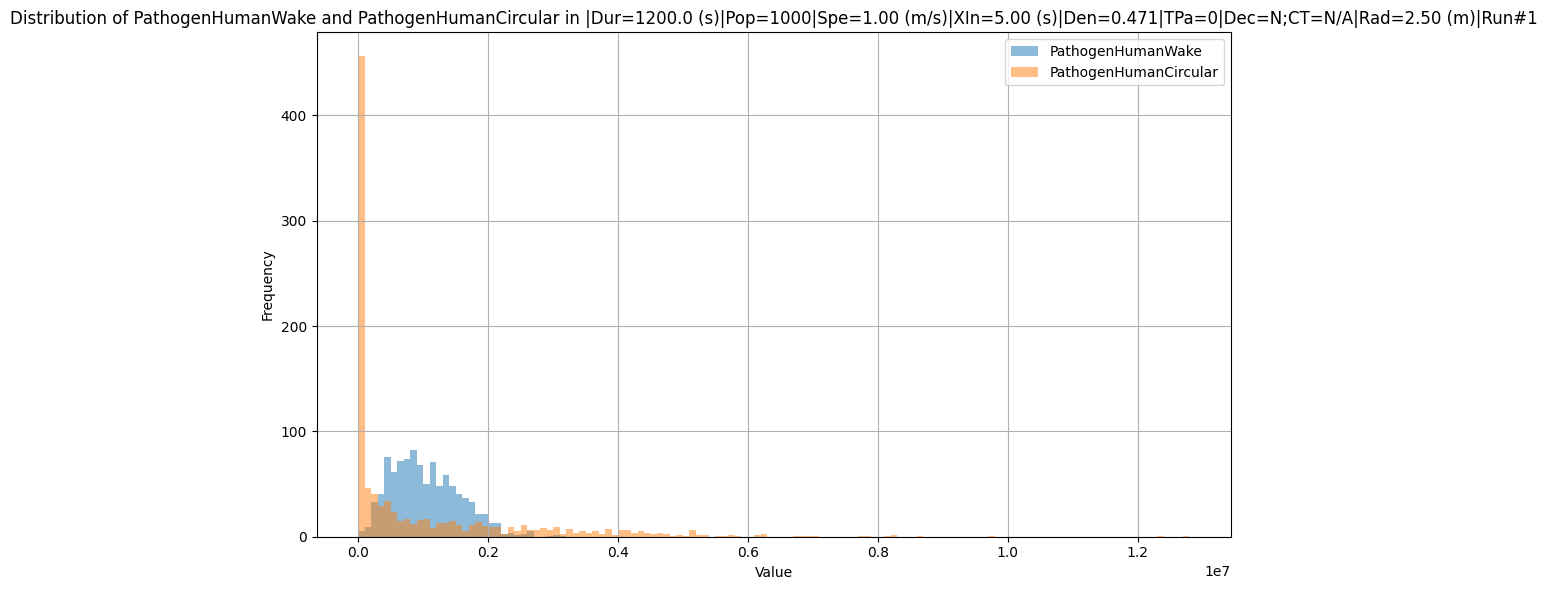

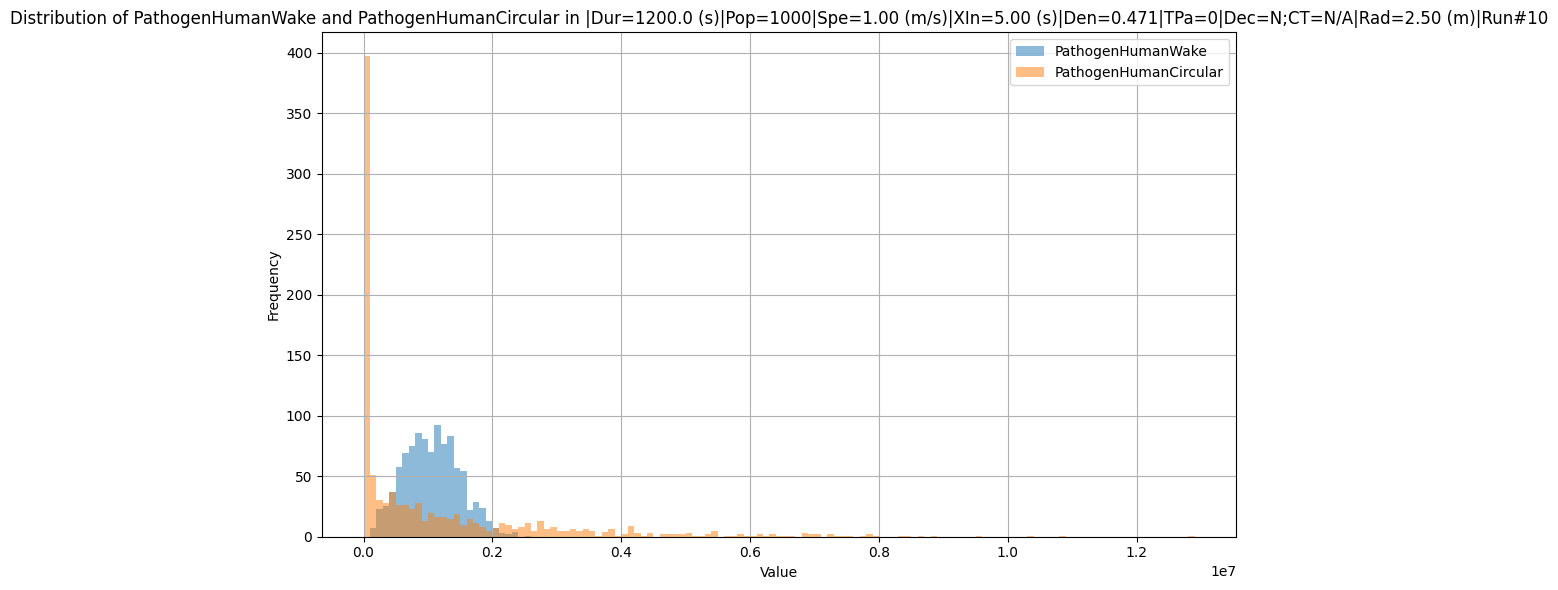

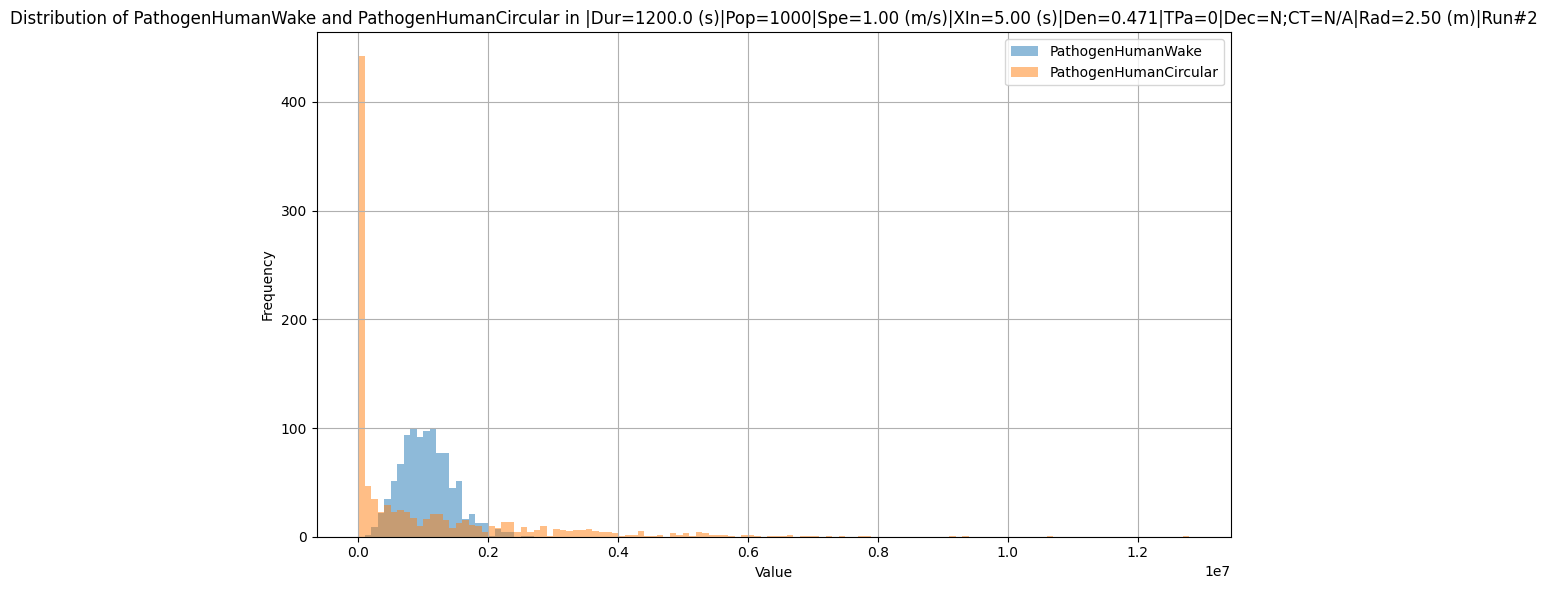

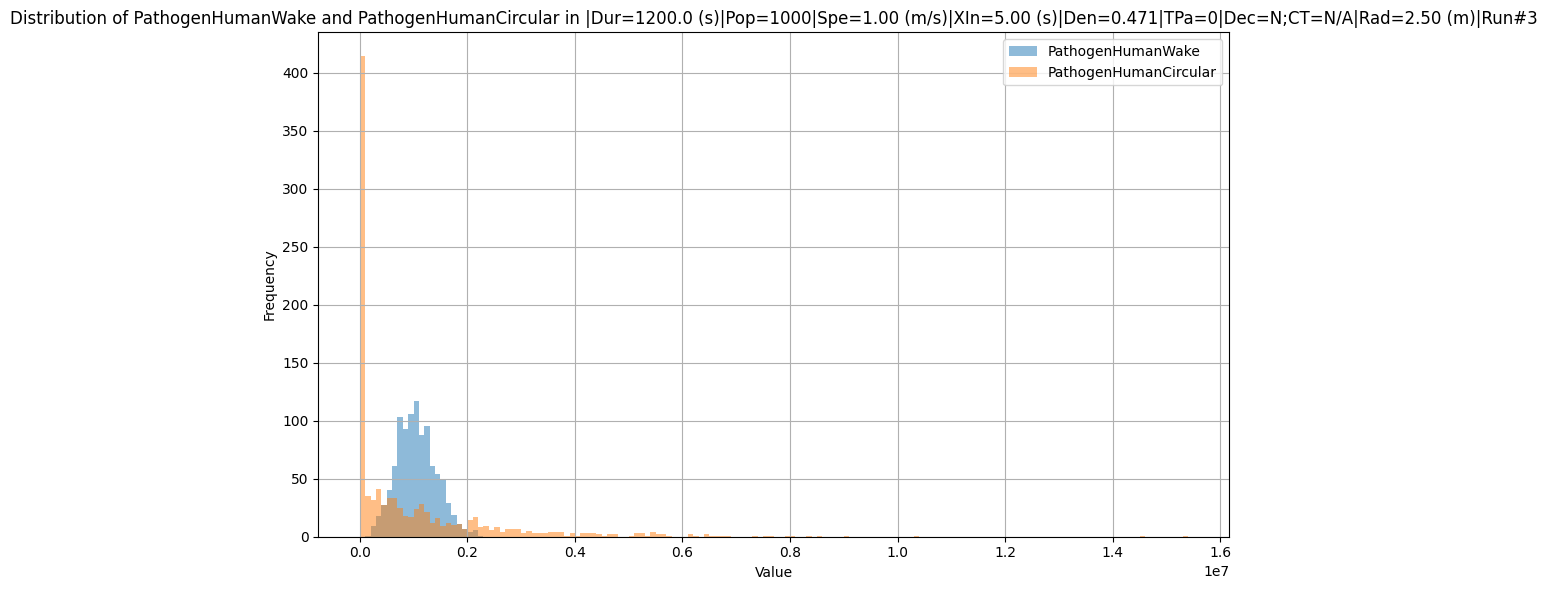

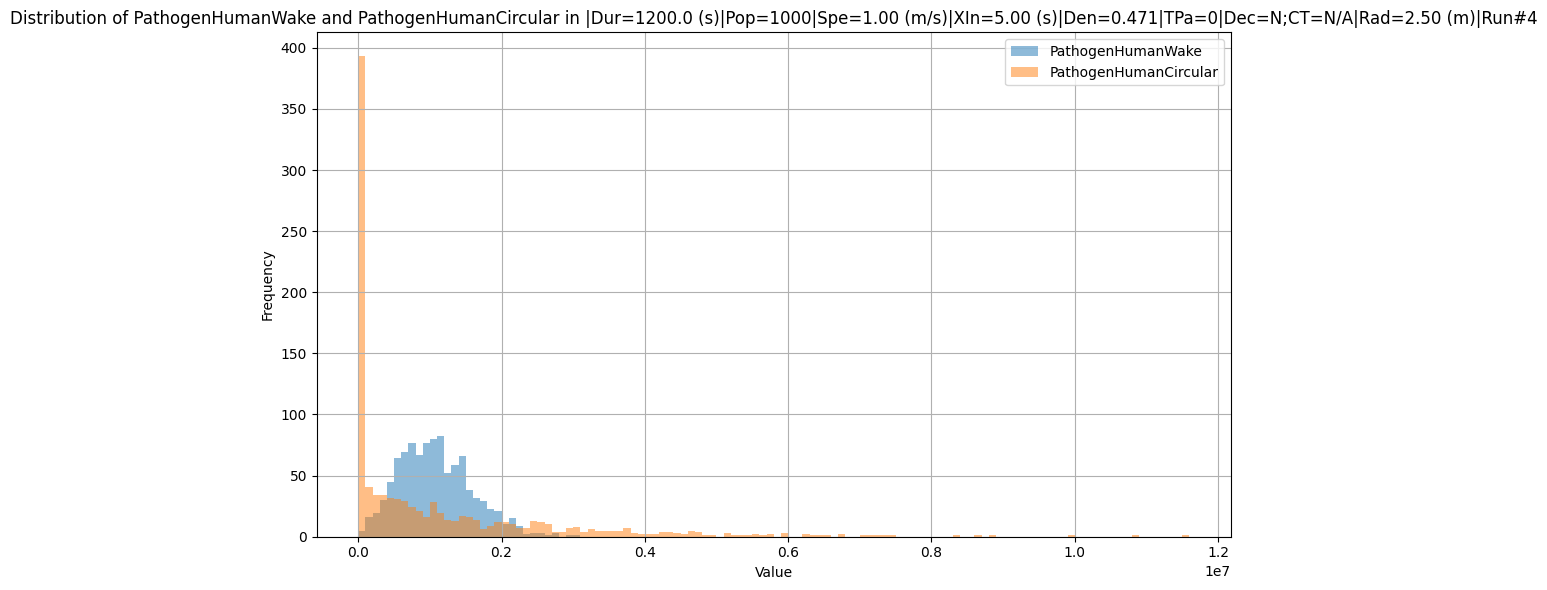

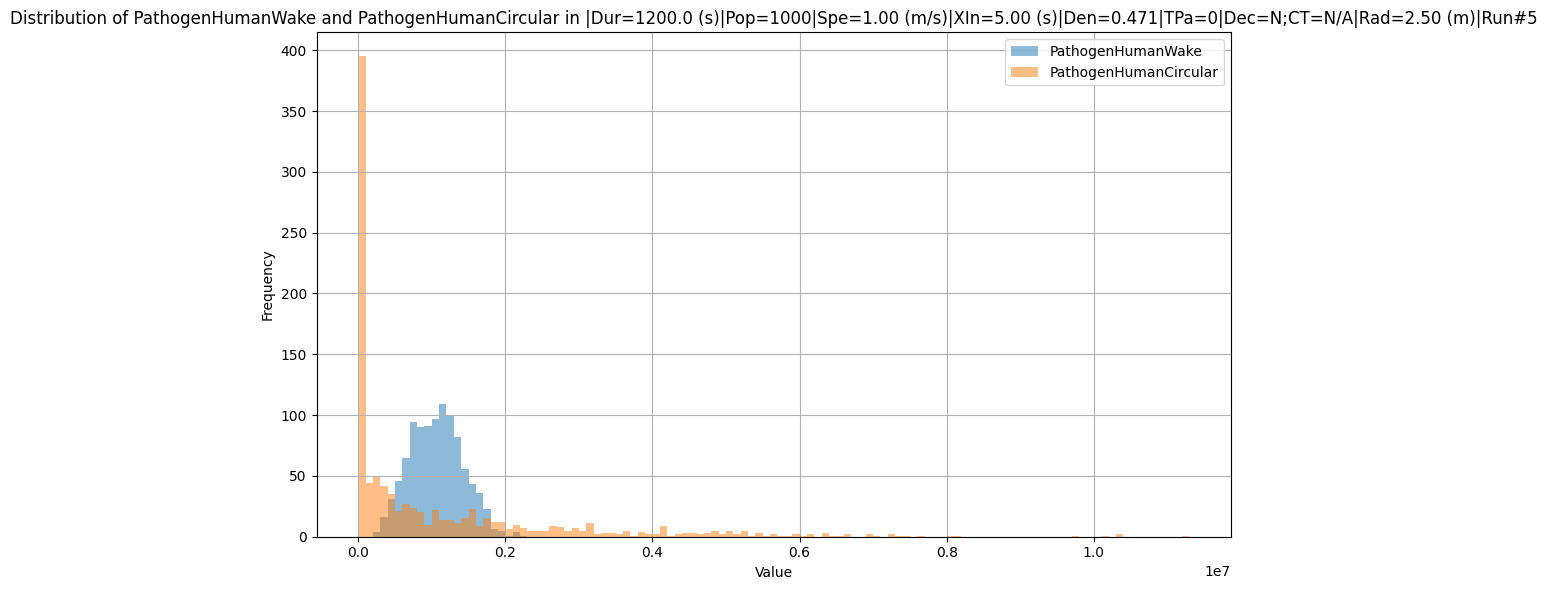

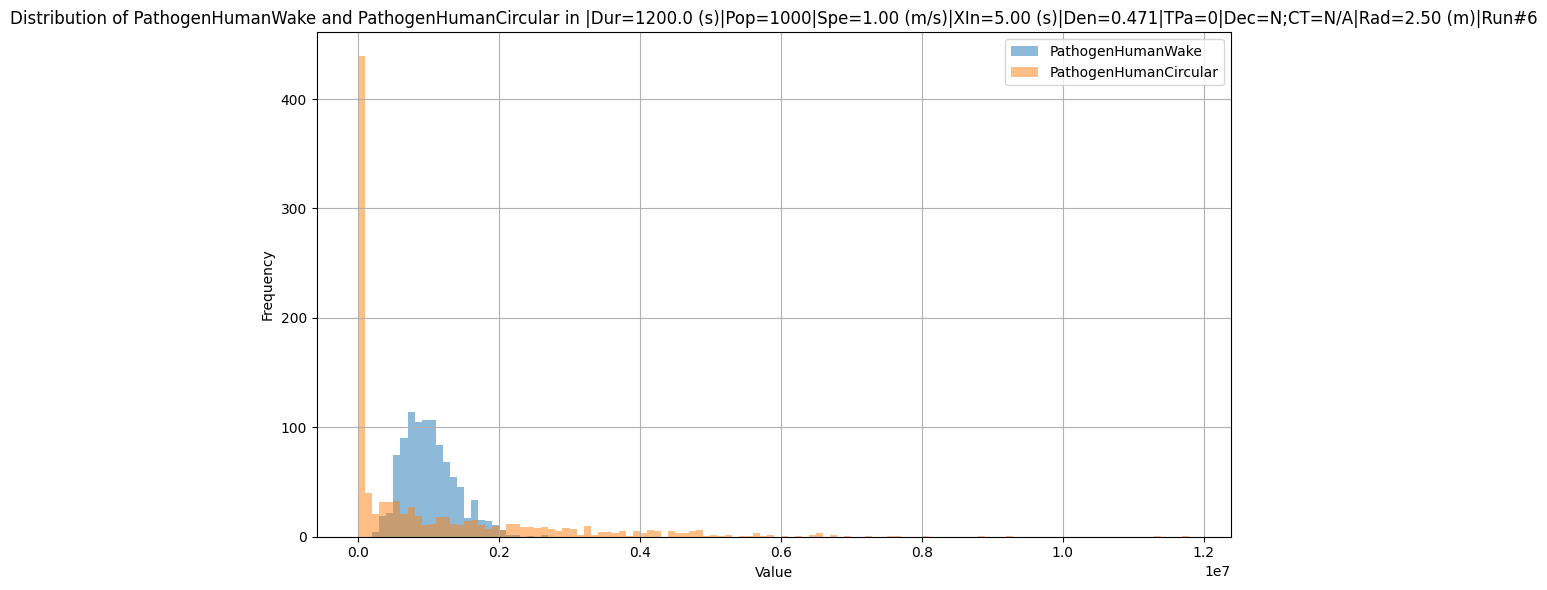

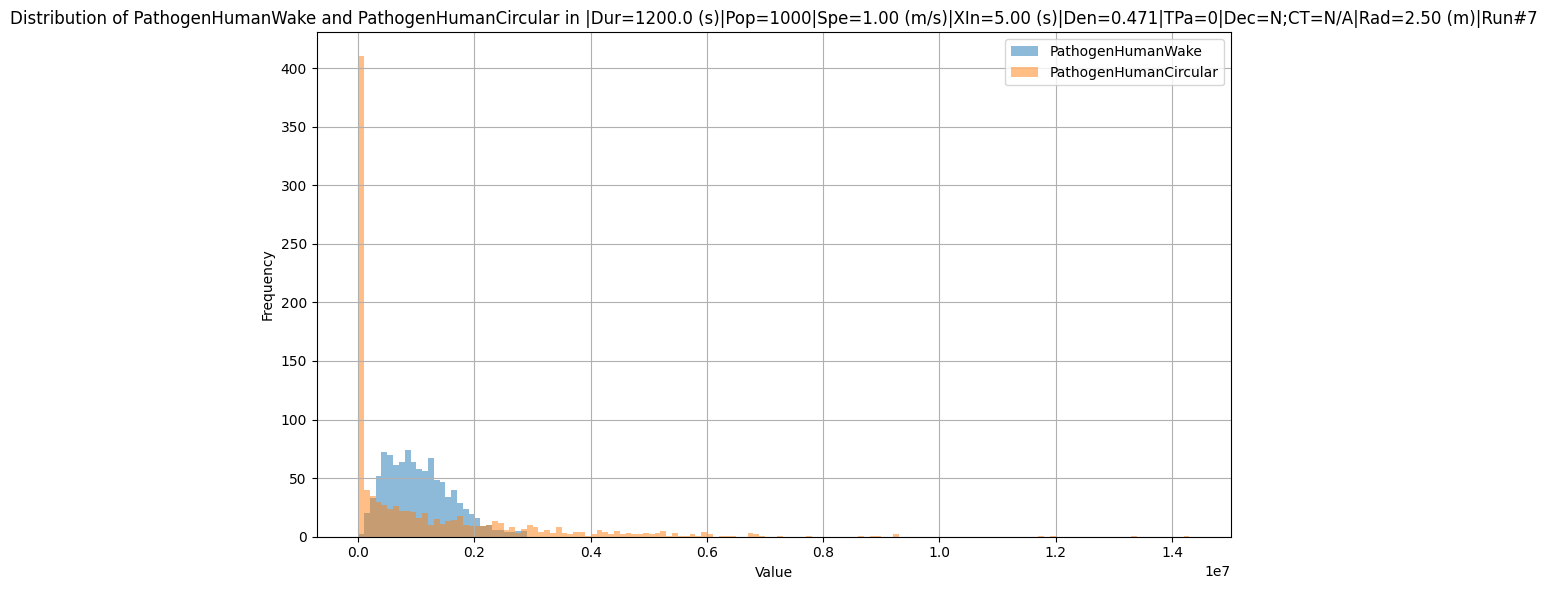

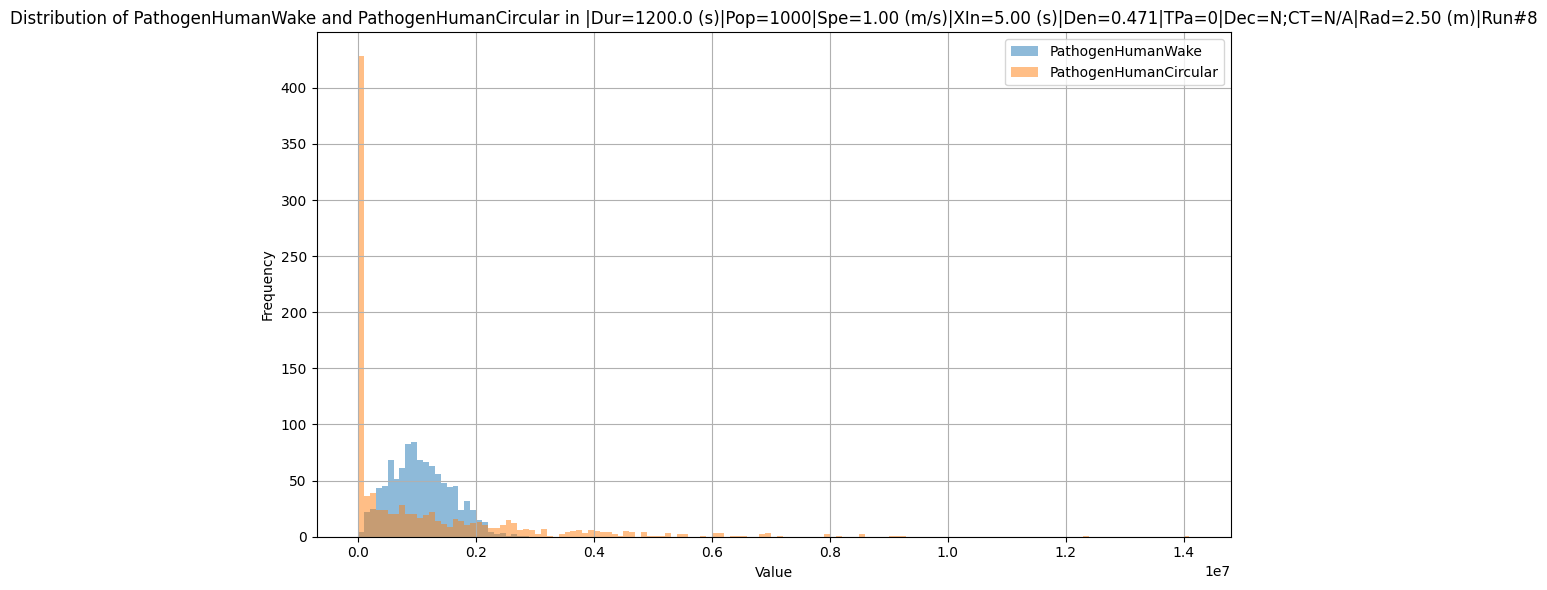

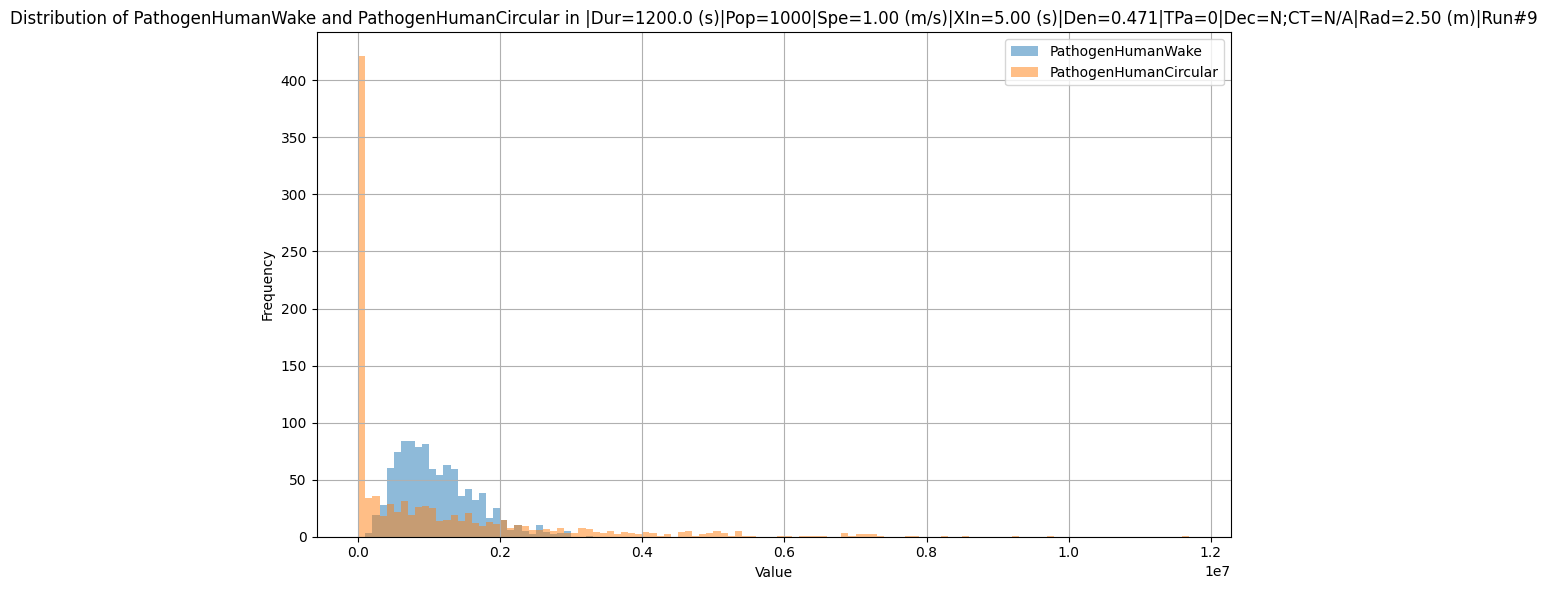

Histogram paths:
['/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#1_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#10_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#2_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#3_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#4_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#5_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#6_histogram.png', '/content/histo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Create a folder named "histograms" to save the images
histograms_folder = '/content/histograms'
os.makedirs(histograms_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Group the data by 'Scenario'
grouped_data = df.groupby('Scenario')

# Plot histogram for each scenario
for scenario, data in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.hist(data['PathogenHumanWake'], bins=range(0, int(data['PathogenHumanWake'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanWake')
    plt.hist(data['PathogenHumanCircular'], bins=range(0, int(data['PathogenHumanCircular'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanCircular')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of PathogenHumanWake and PathogenHumanCircular in {scenario}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Sanitize scenario name for filename
    sanitized_scenario = re.sub(r'[\\/:"*?<>|]', '_', scenario)

    # Save the histogram as a high-quality image in the "histograms" folder
    hist_path = os.path.join(histograms_folder, f'{sanitized_scenario}_histogram.png')
    plt.savefig(hist_path, dpi=300)
    plt.show()

# Print the paths of saved histogram images
print("Histogram paths:")
print([os.path.join(histograms_folder, f'{sanitized_scenario}_histogram.png') for sanitized_scenario in grouped_data.groups])

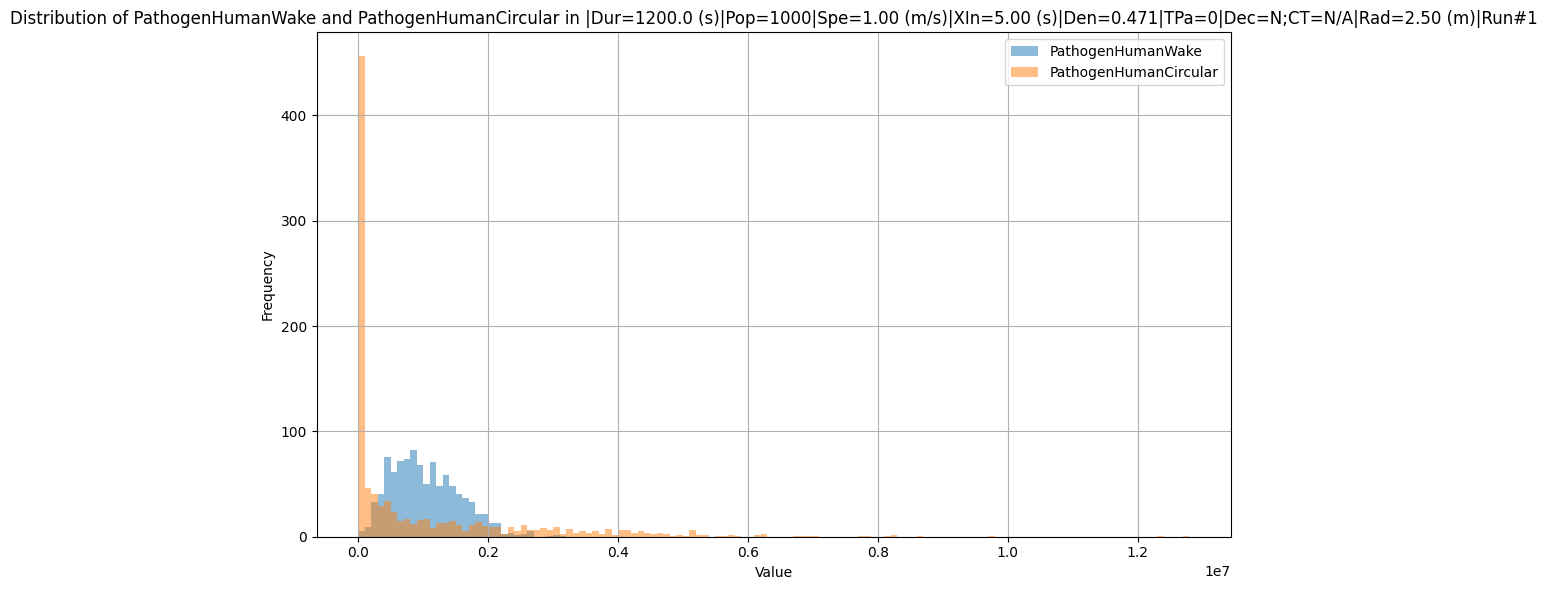

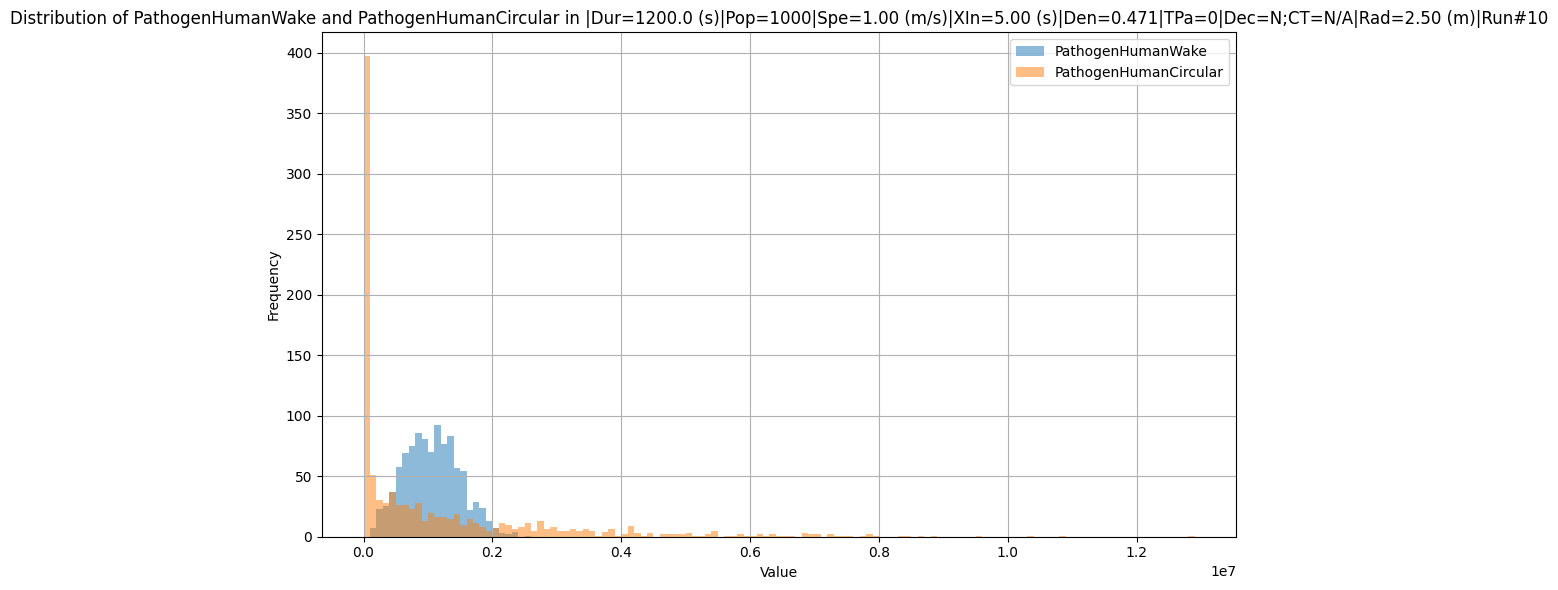

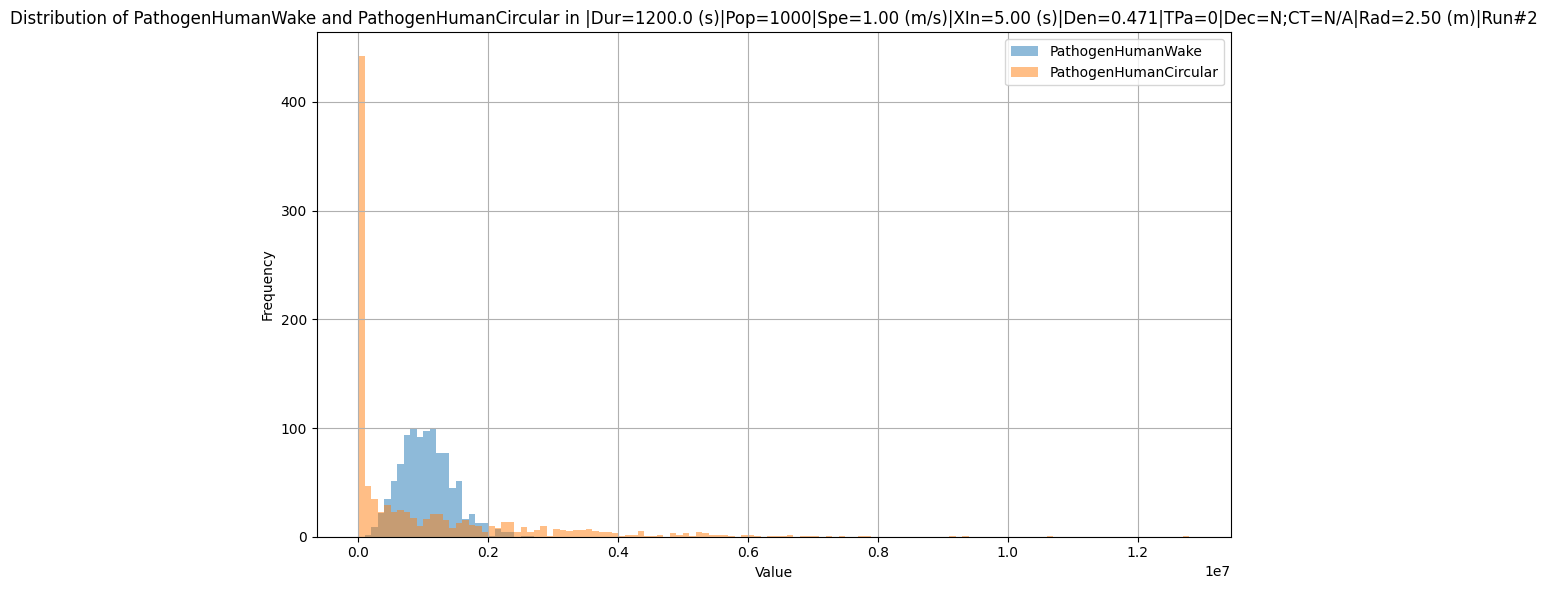

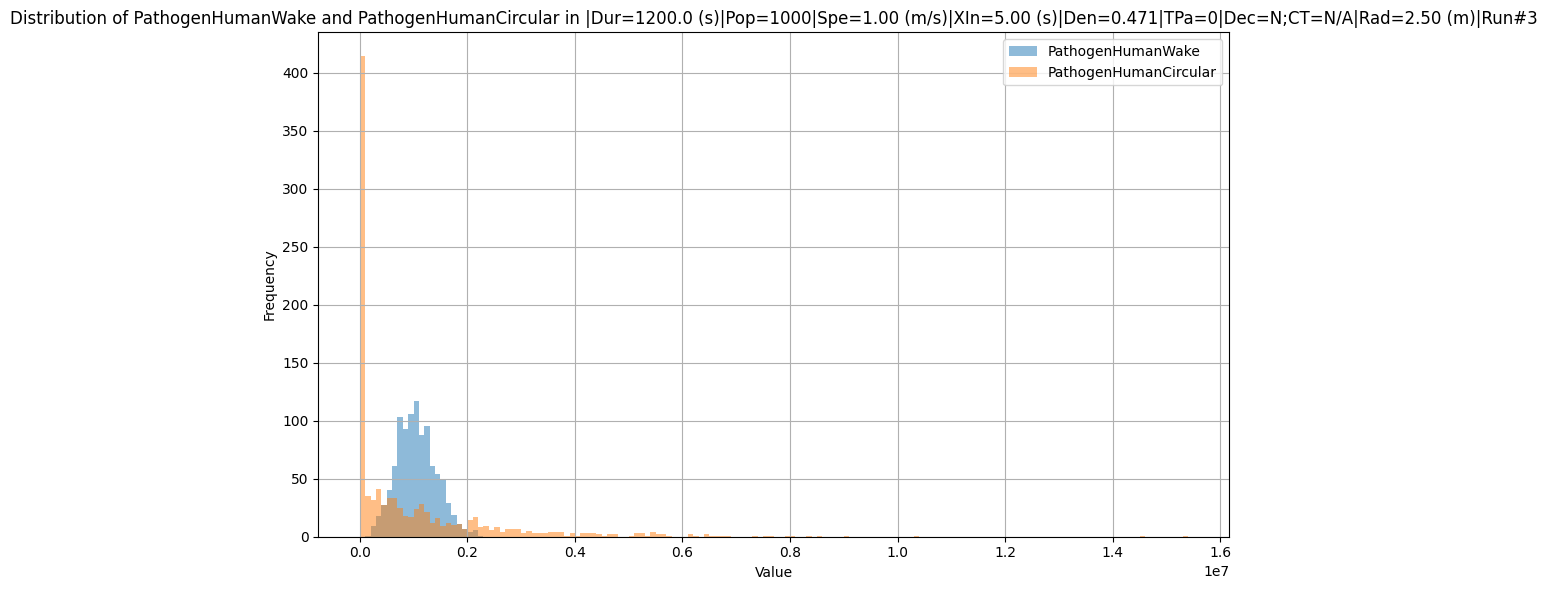

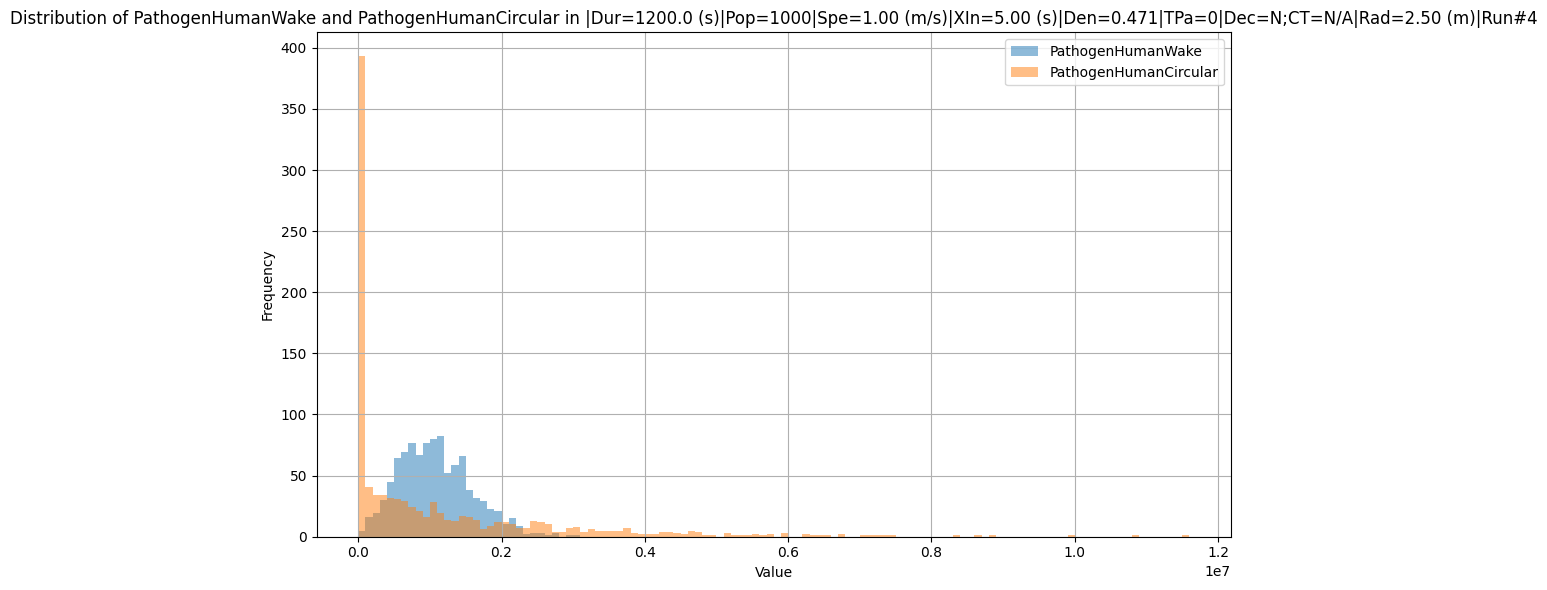

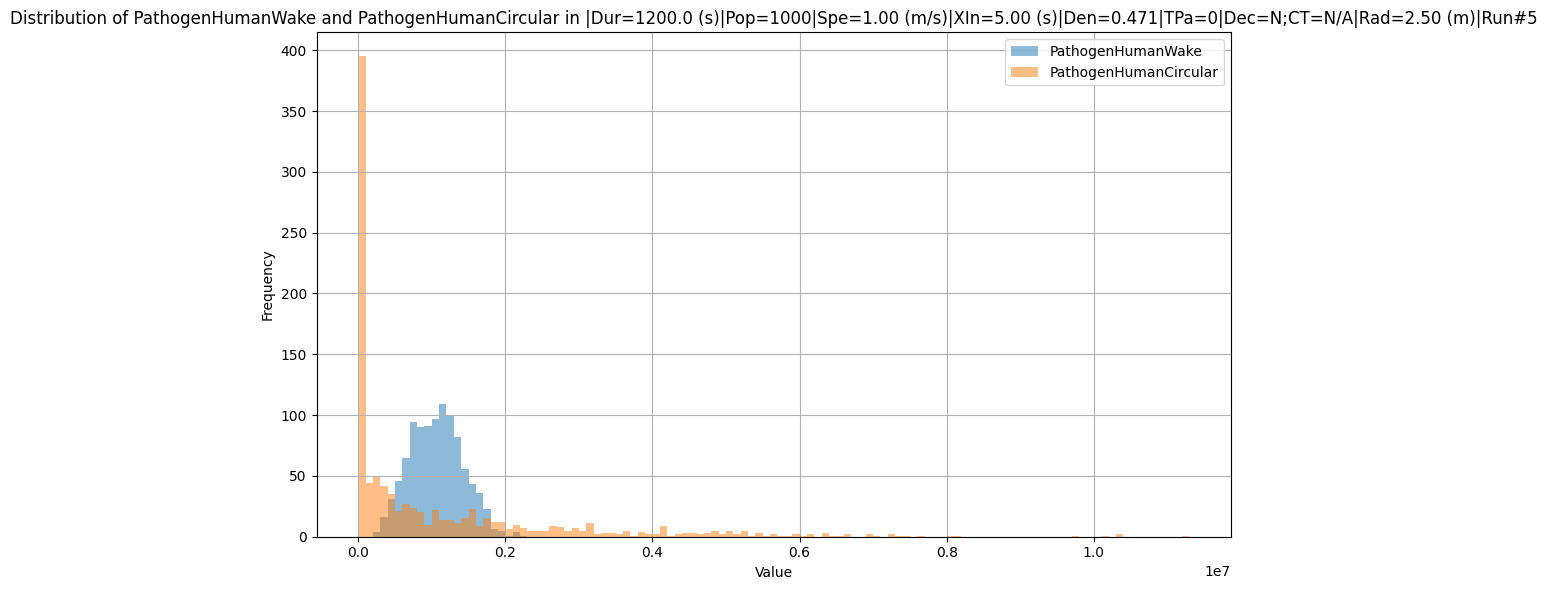

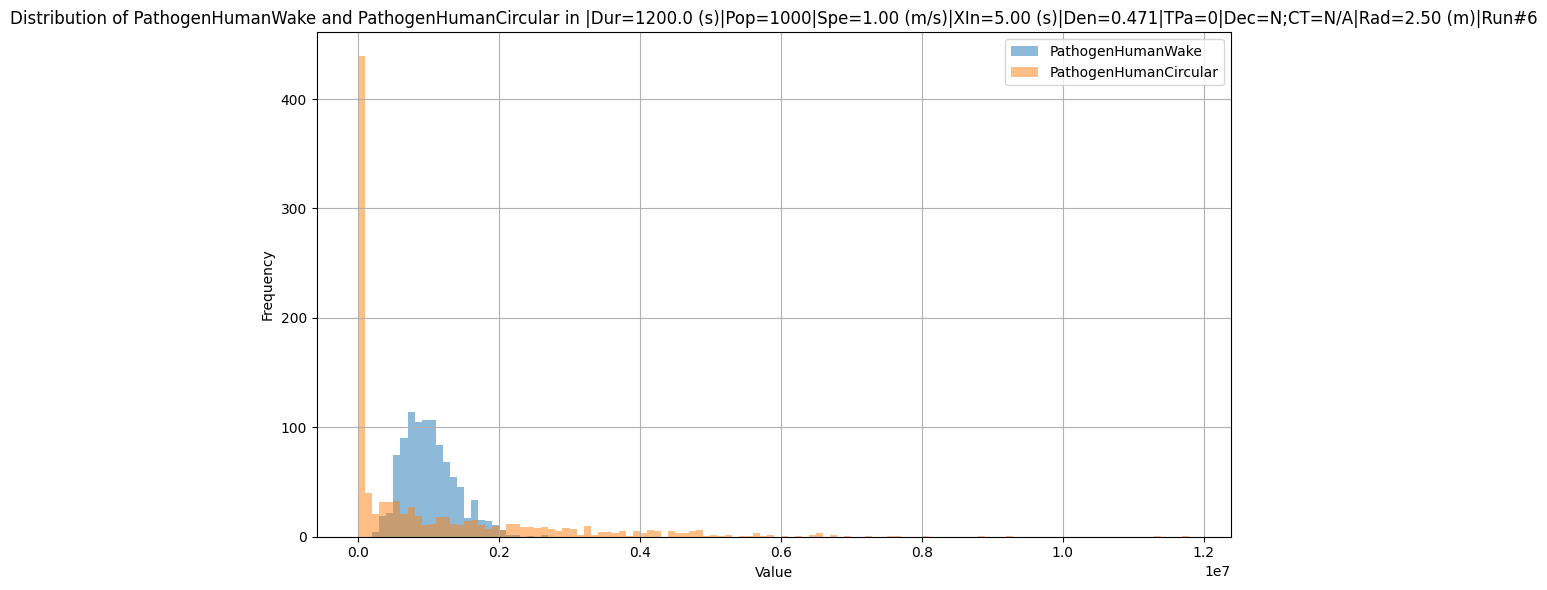

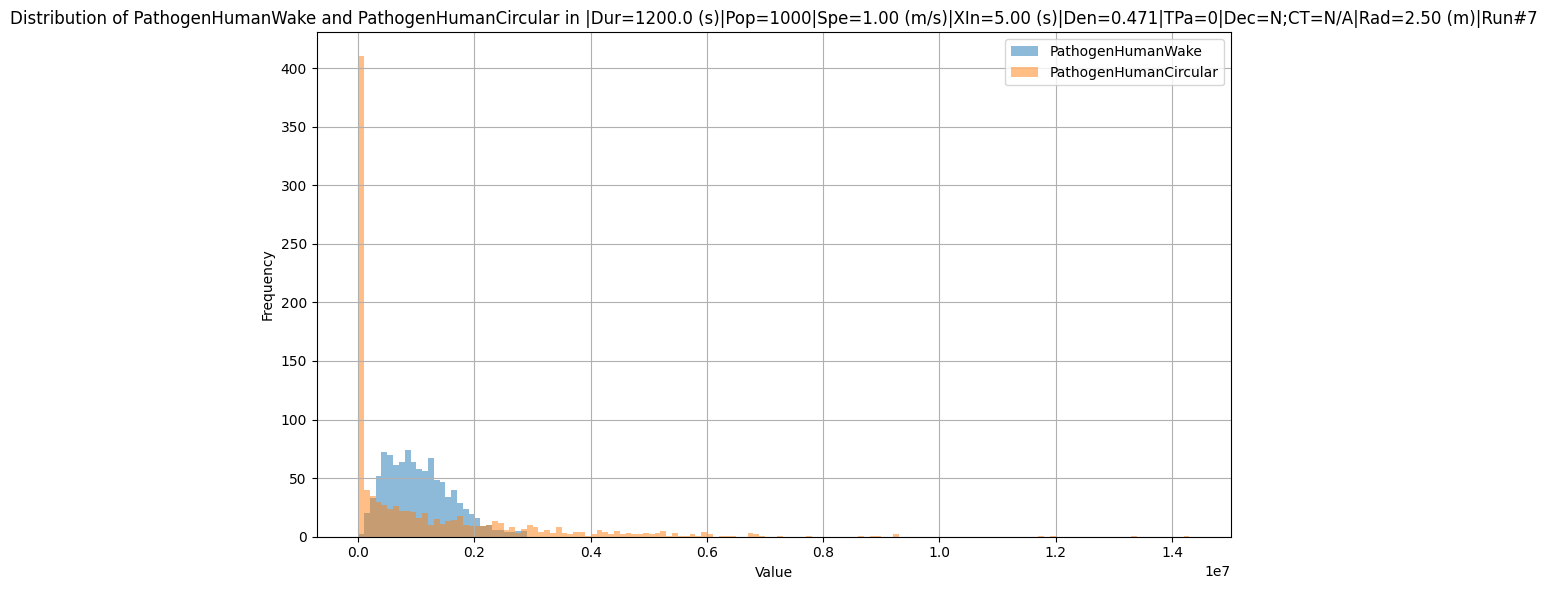

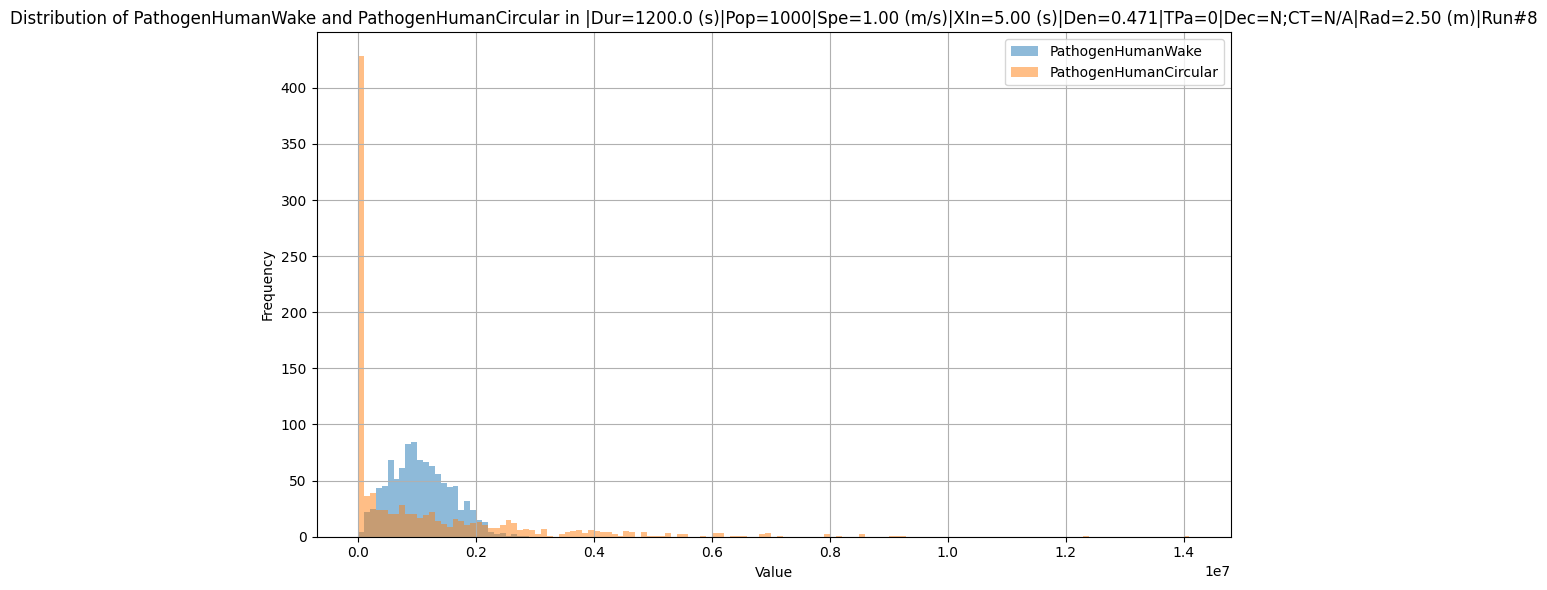

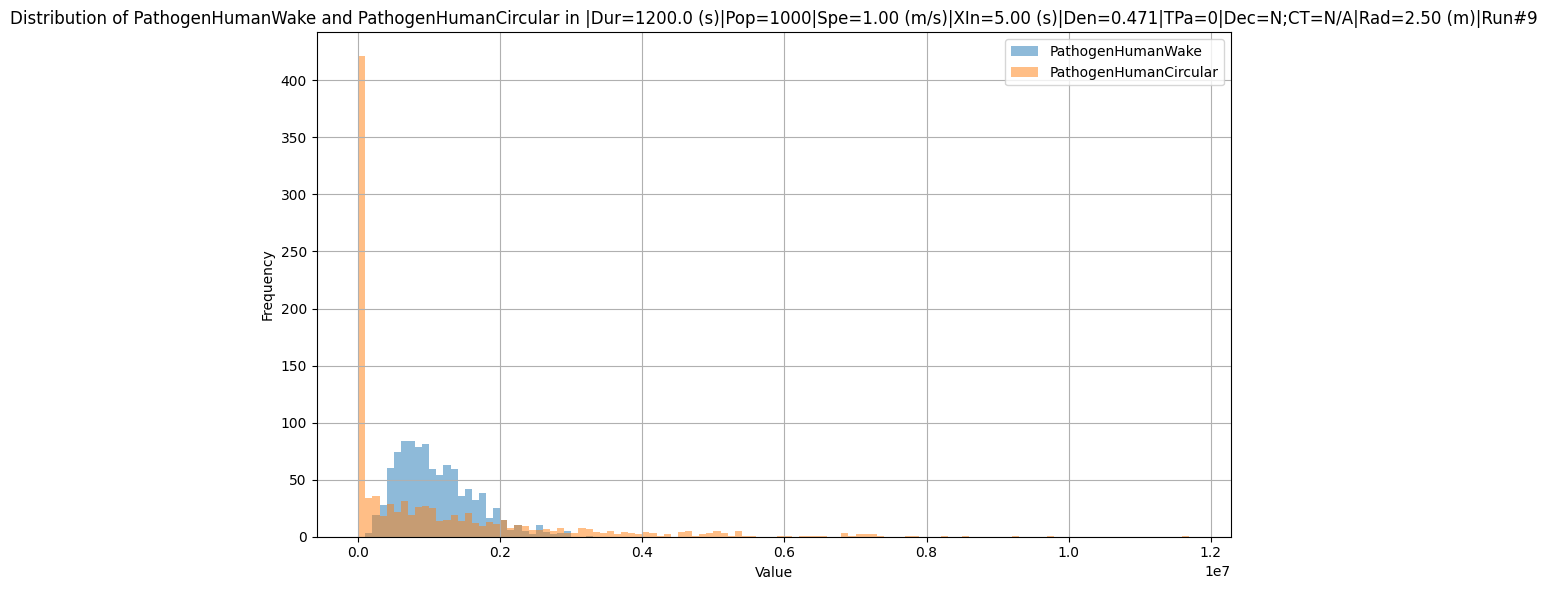

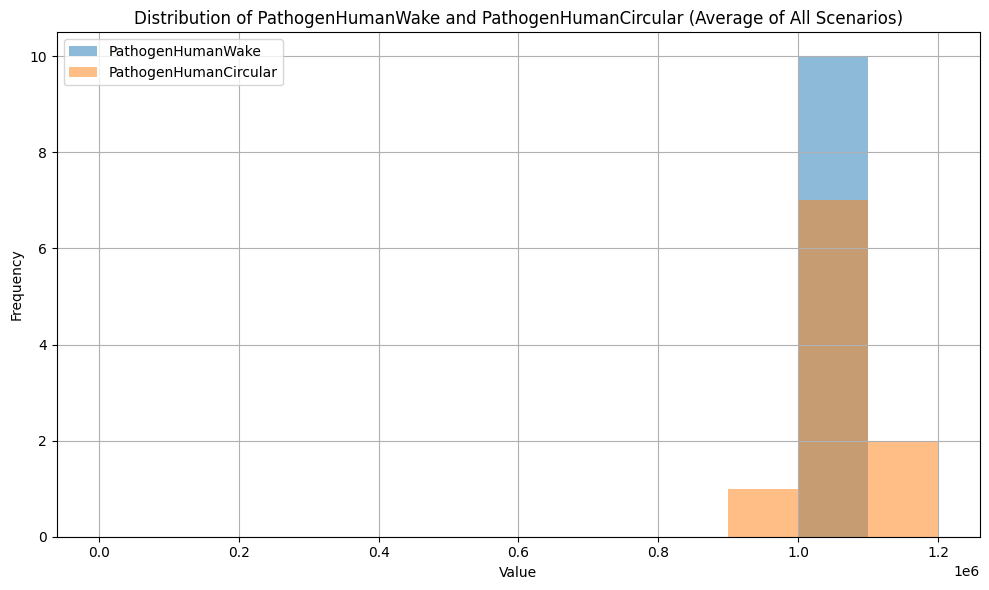

Histogram paths:
['/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#1_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#10_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#2_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#3_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#4_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#5_histogram.png', '/content/histograms/|Dur=1200.0 (s)|Pop=1000|Spe=1.00 (m/s)|XIn=5.00 (s)|Den=0.471|TPa=0|Dec=N;CT=N/A|Rad=2.50 (m)|Run#6_histogram.png', '/content/histo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Create a folder named "histograms" to save the images
histograms_folder = '/content/histograms'
os.makedirs(histograms_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Group the data by 'Scenario'
grouped_data = df.groupby('Scenario')

# Plot histogram for each scenario
for scenario, data in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.hist(data['PathogenHumanWake'], bins=range(0, int(data['PathogenHumanWake'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanWake')
    plt.hist(data['PathogenHumanCircular'], bins=range(0, int(data['PathogenHumanCircular'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanCircular')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of PathogenHumanWake and PathogenHumanCircular in {scenario}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Sanitize scenario name for filename
    sanitized_scenario = re.sub(r'[\\/:"*?<>|]', '_', scenario)

    # Save the histogram as a high-quality image in the "histograms" folder
    hist_path = os.path.join(histograms_folder, f'{sanitized_scenario}_histogram.png')
    plt.savefig(hist_path, dpi=300)
    plt.show()

# Calculate the average of all scenarios
average_data = df.groupby('Scenario').mean()

# Plot histogram for the average of all scenarios
plt.figure(figsize=(10, 6))
plt.hist(average_data['PathogenHumanWake'], bins=range(0, int(average_data['PathogenHumanWake'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanWake')
plt.hist(average_data['PathogenHumanCircular'], bins=range(0, int(average_data['PathogenHumanCircular'].max()) + 100000, 100000), alpha=0.5, label='PathogenHumanCircular')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of PathogenHumanWake and PathogenHumanCircular (Average of All Scenarios)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the histogram of the average as a high-quality image in the "histograms" folder
average_hist_path = os.path.join(histograms_folder, 'average_histogram.png')
plt.savefig(average_hist_path, dpi=300)
plt.show()

# Print the paths of saved histogram images
print("Histogram paths:")
print([os.path.join(histograms_folder, f'{sanitized_scenario}_histogram.png') for sanitized_scenario in grouped_data.groups])
print("Average histogram path:")
print(average_hist_path)

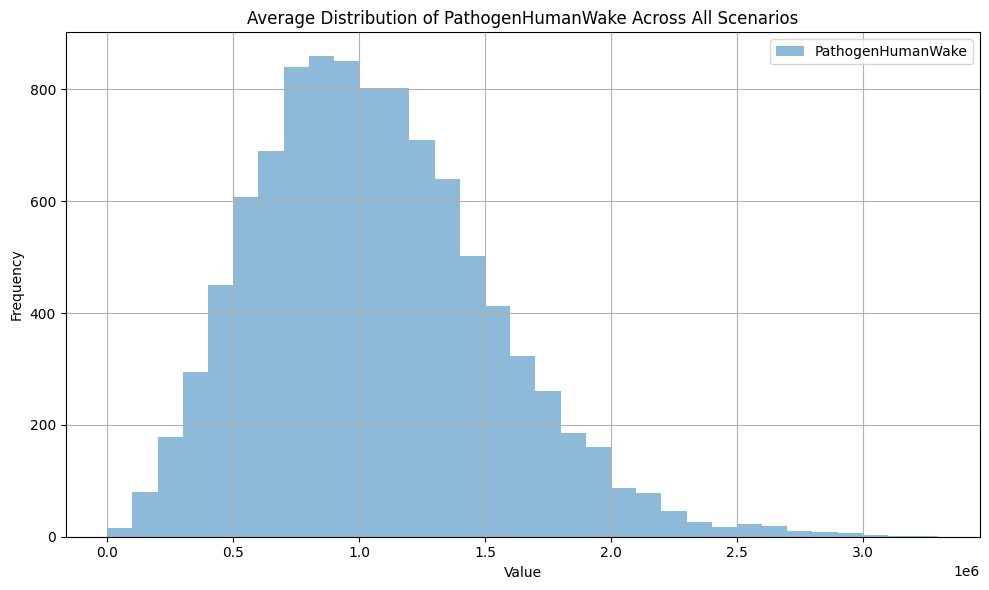

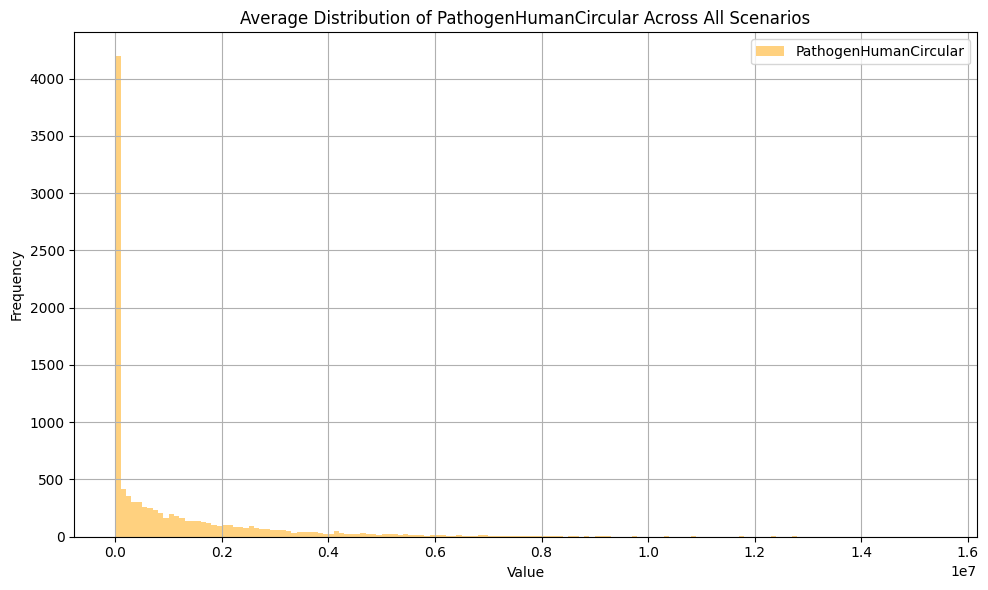

PathogenHumanWake histogram path:
/content/histograms/pathogen_human_wake_histogram.png
PathogenHumanCircular histogram path:
/content/histograms/pathogen_human_circular_histogram.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Create a folder named "histograms" to save the images
histograms_folder = '/content/histograms'
os.makedirs(histograms_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Concatenate all data from different scenarios for PathogenHumanWake and PathogenHumanCircular
concatenated_data_wake = pd.concat([group['PathogenHumanWake'] for _, group in df.groupby('Scenario')], axis=0)
concatenated_data_circular = pd.concat([group['PathogenHumanCircular'] for _, group in df.groupby('Scenario')], axis=0)

# Plot histogram for PathogenHumanWake
plt.figure(figsize=(10, 6))
plt.hist(concatenated_data_wake, bins=range(0, int(concatenated_data_wake.max()) + 100000, 100000), alpha=0.5, label='PathogenHumanWake')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Distribution of PathogenHumanWake Across All Scenarios')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the histogram of PathogenHumanWake as a high-quality image in the "histograms" folder
wake_hist_path = os.path.join(histograms_folder, 'pathogen_human_wake_histogram.png')
plt.savefig(wake_hist_path, dpi=300)
plt.show()

# Plot histogram for PathogenHumanCircular
plt.figure(figsize=(10, 6))
plt.hist(concatenated_data_circular, bins=range(0, int(concatenated_data_circular.max()) + 100000, 100000), alpha=0.5, label='PathogenHumanCircular', color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Distribution of PathogenHumanCircular Across All Scenarios')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the histogram of PathogenHumanCircular as a high-quality image in the "histograms" folder
circular_hist_path = os.path.join(histograms_folder, 'pathogen_human_circular_histogram.png')
plt.savefig(circular_hist_path, dpi=300)
plt.show()

# Print the paths of saved histogram images
print("PathogenHumanWake histogram path:")
print(wake_hist_path)
print("PathogenHumanCircular histogram path:")
print(circular_hist_path)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats

# Create a folder named "histograms" to save the images
histograms_folder = '/content/histograms'
os.makedirs(histograms_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Concatenate all data from different scenarios for PathogenHumanWake and PathogenHumanCircular
concatenated_data_wake = pd.concat([group['PathogenHumanWake'] for _, group in df.groupby('Scenario')], axis=0)
concatenated_data_circular = pd.concat([group['PathogenHumanCircular'] for _, group in df.groupby('Scenario')], axis=0)

# Fit various distributions to the concatenated data
distributions = ['norm', 'expon', 'lognorm', 'gamma']
fit_results_wake = {}
fit_results_circular = {}

for dist_name in distributions:
    # Fit the distribution to PathogenHumanWake data
    dist_params_wake = getattr(stats, dist_name).fit(concatenated_data_wake)
    ks_stat_wake = stats.kstest(concatenated_data_wake, dist_name, args=dist_params_wake)[0]
    expected_freq_wake = stats.norm.pdf(np.histogram(concatenated_data_wake, bins=100)[1][:-1], *dist_params_wake) * len(concatenated_data_wake)
    observed_freq_wake = np.histogram(concatenated_data_wake, bins=100)[0]
    observed_sum_wake = observed_freq_wake.sum()
    expected_sum_wake = expected_freq_wake.sum()
    expected_freq_wake *= observed_sum_wake / expected_sum_wake  # Normalize expected frequencies
    chi2_stat_wake = stats.chisquare(observed_freq_wake, expected_freq_wake)[0]
    fit_results_wake[dist_name] = {
        'params': dist_params_wake,
        'KS_stat': ks_stat_wake,
        'chi2_stat': chi2_stat_wake
    }

    # Fit the distribution to PathogenHumanCircular data
    dist_params_circular = getattr(stats, dist_name).fit(concatenated_data_circular)
    ks_stat_circular = stats.kstest(concatenated_data_circular, dist_name, args=dist_params_circular)[0]
    expected_freq_circular = stats.norm.pdf(np.histogram(concatenated_data_circular, bins=100)[1][:-1], *dist_params_circular) * len(concatenated_data_circular)
    observed_freq_circular = np.histogram(concatenated_data_circular, bins=100)[0]
    observed_sum_circular = observed_freq_circular.sum()
    expected_sum_circular = expected_freq_circular.sum()
    expected_freq_circular *= observed_sum_circular / expected_sum_circular  # Normalize expected frequencies
    chi2_stat_circular = stats.chisquare(observed_freq_circular, expected_freq_circular)[0]
    fit_results_circular[dist_name] = {
        'params': dist_params_circular,
        'KS_stat': ks_stat_circular,
        'chi2_stat': chi2_stat_circular
    }

# Plot histograms for PathogenHumanWake and PathogenHumanCircular
plt.figure(figsize=(10, 6))

# Plot histogram for PathogenHumanWake
plt.hist(concatenated_data_wake, bins=range(0, int(concatenated_data_wake.max()) + 100000, 100000),
         alpha=0.5, label='PathogenHumanWake', color='blue', density=True)

# Plot histogram for PathogenHumanCircular
plt.hist(concatenated_data_circular, bins=range(0, int(concatenated_data_circular.max()) + 100000, 100000),
         alpha=0.5, label='PathogenHumanCircular', color='orange', density=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of PathogenHumanWake and PathogenHumanCircular')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the histogram as a high-quality image in the "histograms" folder
hist_path = os.path.join(histograms_folder, 'pathogen_human_histograms.png')
plt.savefig(hist_path, dpi=300)
plt.show()

# Print the paths of saved histogram image
print("Histograms path:")
print(hist_path)

# Print fit results for PathogenHumanWake
print("Fit results for PathogenHumanWake:")
print(pd.DataFrame.from_dict(fit_results_wake, orient='index'))

# Print fit results for PathogenHumanCircular
print("Fit results for PathogenHumanCircular:")
print(pd.DataFrame.from_dict(fit_results_circular, orient='index'))


TypeError: _parse_args() takes from 1 to 3 positional arguments but 4 were given

### 2.2. **Upload Plots of Raw Data on Google Drive to be able to Add to Google Slides**

/content/mass-gathering-project-421115-bc8b850bf99a.json

https://chat.openai.com/share/d6c66a48-e1b8-4417-b8cc-056e50f24076